
**Mini Proyecto 1: Analisis de bio-señales para computacion afectiva**

**presentado por:**

* **Mauricio Rios. cc: 98696437**

* **Santiago Sepulveda. cc: 1022097969**


**Procedemos a cargar el drive personal.**

In [3]:
#Librerías que vamos a utilizar
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats
import librosa
import scipy.signal
import scipy.integrate as integrate
import pandas as pd

#cargamos el drive
from google.colab import drive
drive.mount('/content/drive')

## funciones para graficar las señales

def signalGSR (i):
  trial = i+1 # video u observación 
  channel = 37 # GSR (valores de Twente convertidos al formato de Ginebra (Ohm))
  signal_GSR = X[trial-1,channel-1,:]
  return (signal_GSR)

def signalRespiracion (j):
  trial = j+1 # video u observación 
  channel = 38 # Respiration belt
  signal_Respiracion = X[trial-1,channel-1,:]
  return (signal_Respiracion)  

def signalTemperatura (j):
  trial = j+1 # video u observación 
  channel = 40 # Temperature
  signal_temperatura = X[trial-1,channel-1,:]
  return (signal_temperatura)

def signalVolumensangre (j):
  trial = j+1 # video u observación 
  channel = 39 # Blood volume pressure
  signal_volumensangre = X[trial-1,channel-1,:]
  return (signal_volumensangre)

def signalEMG (j):
  trial = j+1 # video u observación 
  channel = 35 # EMG
  signal_EMG = X[trial-1,channel-1,:]
  return (signal_EMG)

def signalEOG (j):
  trial = j+1 # video u observación 
  channel = 33 # EOG
  signal_EOG = X[trial-1,channel-1,:]
  return (signal_EOG)


Mounted at /content/drive


In [4]:
import scipy.io as sio
import scipy.signal
from scipy import signal 
import matplotlib.pyplot as plt
import numpy as np

ruta = '/content/drive/My Drive/dataseñales3/data/'
fileName = 's13.mat'
db = sio.loadmat(ruta+fileName)
db

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Aug 21 08:32:18 2013',
 '__version__': '1.0',
 'data': array([[[ 8.28135551e+00, -5.84494025e-01, -1.65050363e+01, ...,
           2.07452119e+01,  2.66017660e+01,  2.94889903e+01],
         [ 1.51539260e+01, -4.25256977e+00, -3.10909475e+01, ...,
           4.23556350e+01,  3.91713892e+01,  2.31362054e+01],
         [ 1.68153542e+01, -1.54992386e+00, -2.59388917e+01, ...,
           3.85480808e+01,  3.38651674e+01,  1.74663068e+01],
         ...,
         [-8.16272092e+01, -1.29877120e+02, -1.21689635e+02, ...,
          -1.95203000e+03, -1.81390526e+03, -1.54846825e+03],
         [ 2.24726377e+03,  2.27900156e+03,  2.33173514e+03, ...,
           4.39185779e+02,  3.65944704e+02,  3.02957380e+02],
         [ 9.68997999e-03,  8.68999280e-03,  9.68997999e-03, ...,
           1.03688775e-01,  1.03688775e-01,  1.03688775e-01]],
 
        [[ 3.94502583e+00, -3.21653802e+00, -8.94409799e+00, ...,
  

In [5]:
X = db['data'] #Guardar en X los datos 
print(' matriz: '+str(X.shape)) #miramos el tamaño y las dimensiones de la base de datos

print('Videos: ' +str(X.shape[0]))
print('Canales: ' +str(X.shape[1]))
print('Muestras: ' +str(X.shape[2]))



 matriz: (40, 40, 6528)
Videos: 40
Canales: 40
Muestras: 6528


**Se procede a graficar las respuestas GSR del sujeto 13 a los 40 videos**

(6528,)
 VIDEO:  1


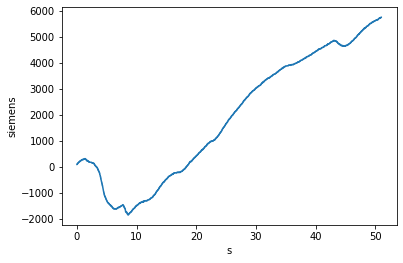

(6528,)
 VIDEO:  2


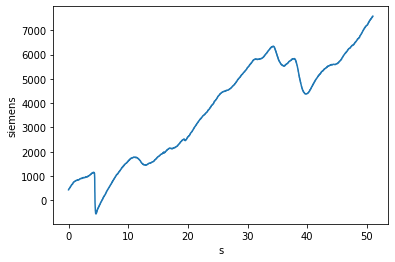

(6528,)
 VIDEO:  3


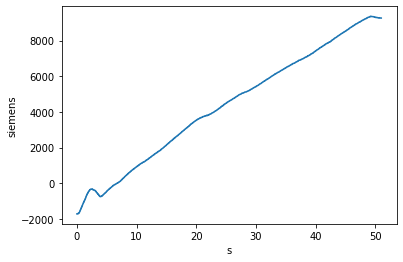

(6528,)
 VIDEO:  4


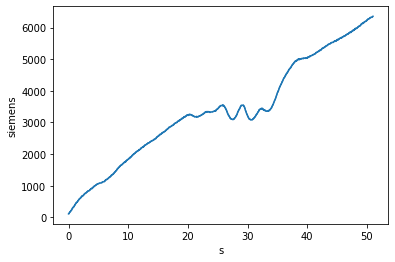

(6528,)
 VIDEO:  5


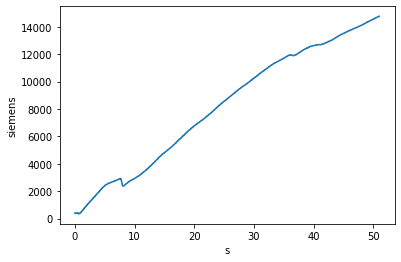

(6528,)
 VIDEO:  6


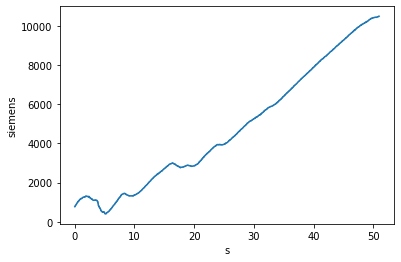

(6528,)
 VIDEO:  7


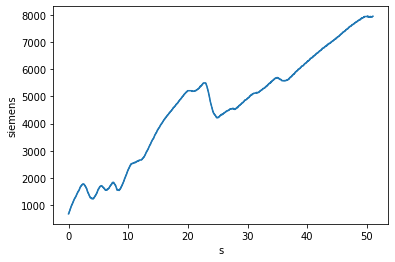

(6528,)
 VIDEO:  8


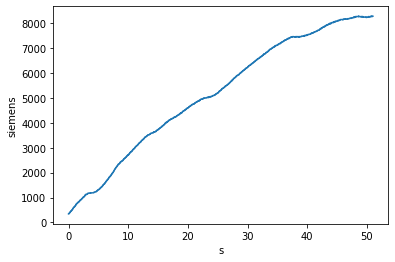

(6528,)
 VIDEO:  9


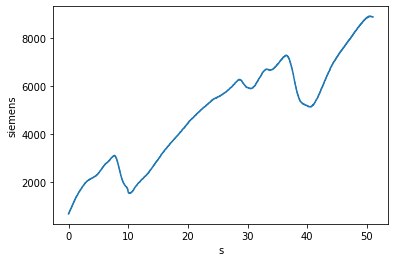

(6528,)
 VIDEO:  10


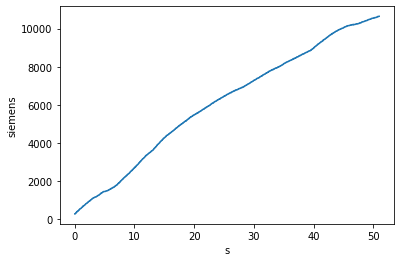

(6528,)
 VIDEO:  11


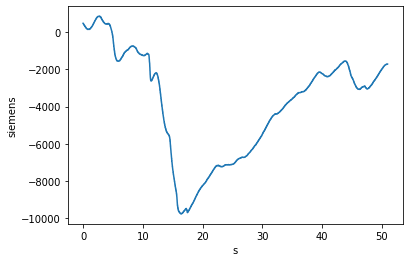

(6528,)
 VIDEO:  12


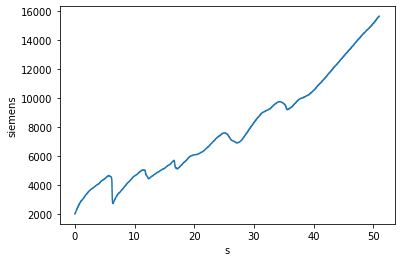

(6528,)
 VIDEO:  13


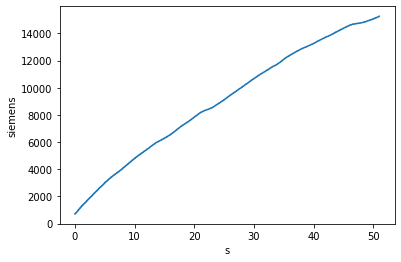

(6528,)
 VIDEO:  14


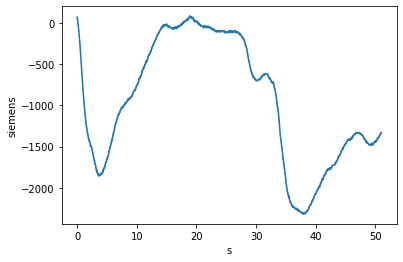

(6528,)
 VIDEO:  15


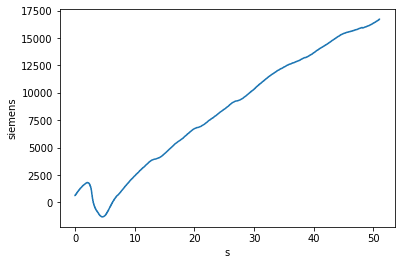

(6528,)
 VIDEO:  16


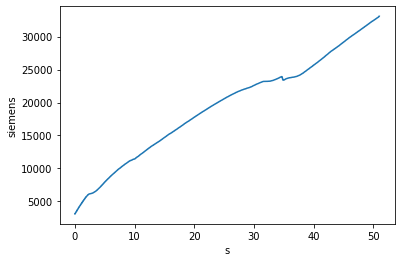

(6528,)
 VIDEO:  17


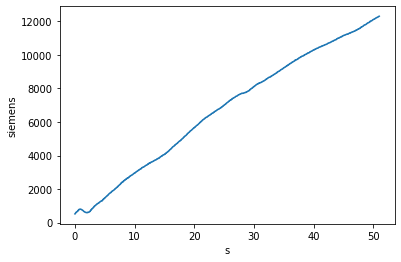

(6528,)
 VIDEO:  18


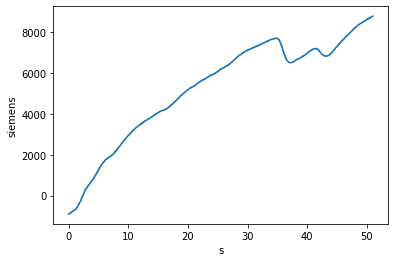

(6528,)
 VIDEO:  19


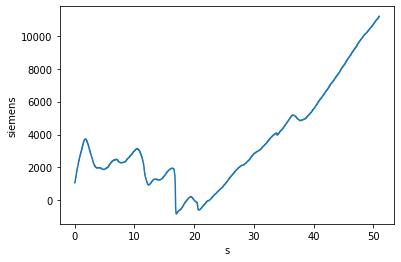

(6528,)
 VIDEO:  20


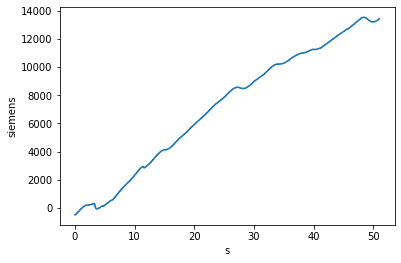

(6528,)
 VIDEO:  21


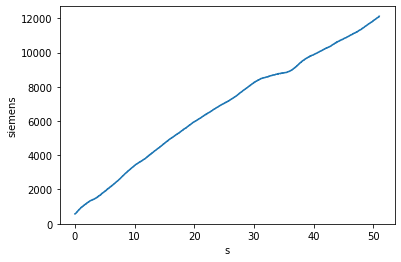

(6528,)
 VIDEO:  22


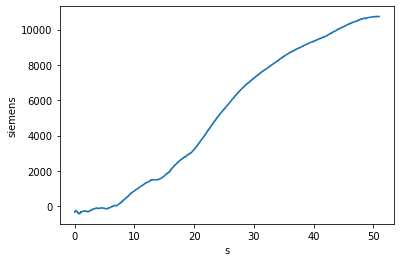

(6528,)
 VIDEO:  23


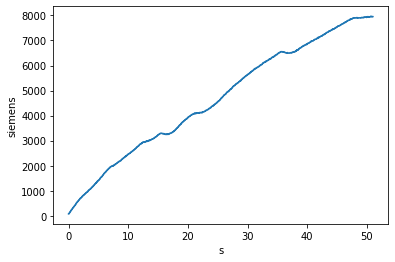

(6528,)
 VIDEO:  24


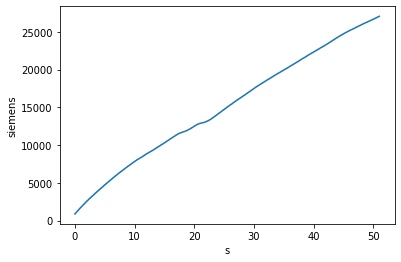

(6528,)
 VIDEO:  25


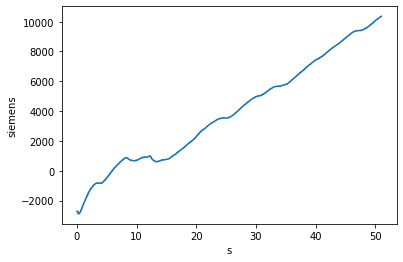

(6528,)
 VIDEO:  26


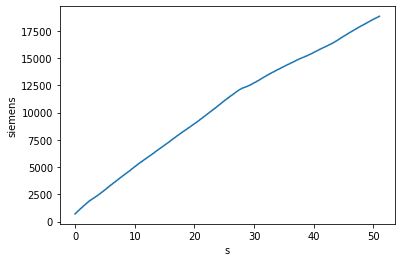

(6528,)
 VIDEO:  27


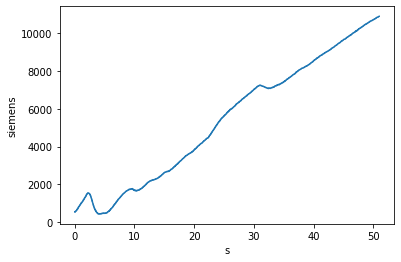

(6528,)
 VIDEO:  28


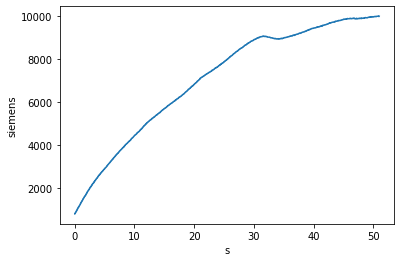

(6528,)
 VIDEO:  29


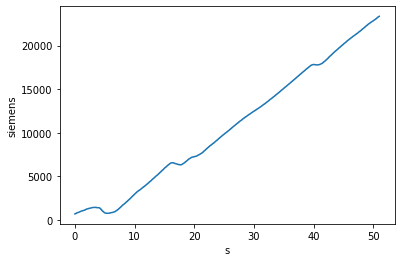

(6528,)
 VIDEO:  30


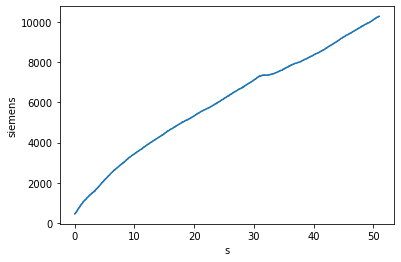

(6528,)
 VIDEO:  31


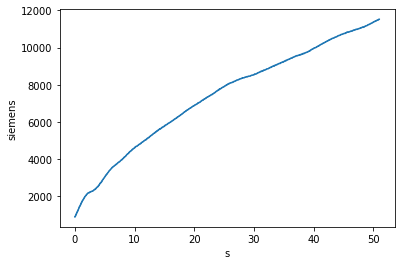

(6528,)
 VIDEO:  32


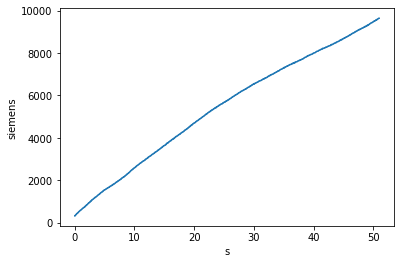

(6528,)
 VIDEO:  33


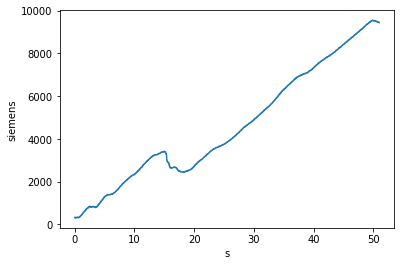

(6528,)
 VIDEO:  34


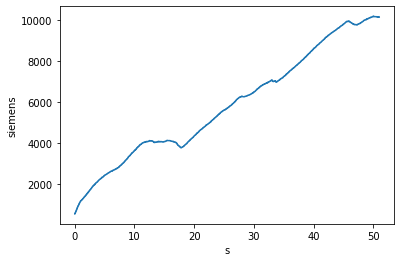

(6528,)
 VIDEO:  35


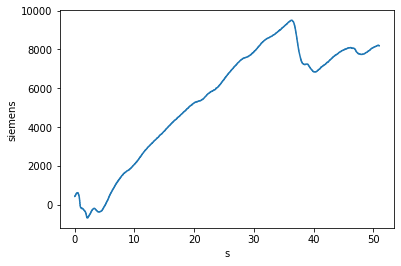

(6528,)
 VIDEO:  36


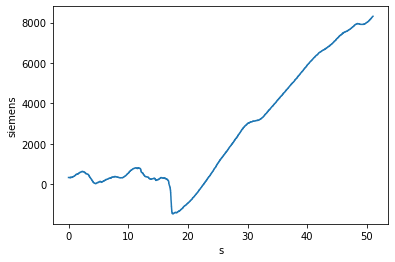

(6528,)
 VIDEO:  37


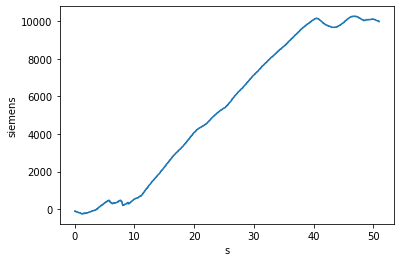

(6528,)
 VIDEO:  38


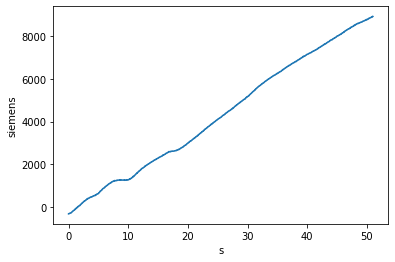

(6528,)
 VIDEO:  39


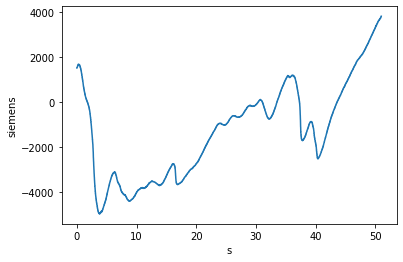

(6528,)
 VIDEO:  40


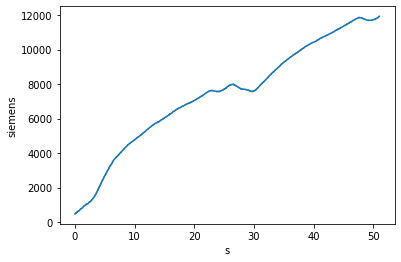

In [6]:

for i in range(40):
  signal_GSR = signalGSR(i)
  print(signal_GSR.shape)
  ts = len(signal_GSR)/128.
  time = np.linspace(0,ts,len(signal_GSR))

  print(" VIDEO: ", i+1)
  plt.plot(time,signal_GSR)
  plt.ylabel('siemens')
  plt.xlabel('s' )
  plt.show()

**PRIMERA CARACTERISTICA:**

**Esta caracteristica muestra el promedio de cada señal**

In [7]:
promedio_GSR=[]
for i in range(40):
  signal_GSR = signalGSR(i)
  promedio_GSR.append(np.mean(signal_GSR))
  print("Promedio señal GSR", i+1, ":", promedio_GSR[i])


Promedio señal GSR 1 : 1883.1542954567267
Promedio señal GSR 2 : 3713.852756957549
Promedio señal GSR 3 : 4368.021543681664
Promedio señal GSR 4 : 3374.094973743466
Promedio señal GSR 5 : 8206.456244777872
Promedio señal GSR 6 : 4768.92946179991
Promedio señal GSR 7 : 4631.394631368533
Promedio señal GSR 8 : 5177.42335125924
Promedio señal GSR 9 : 4878.05295942791
Promedio señal GSR 10 : 6118.103602784976
Promedio señal GSR 11 : -3861.157697397728
Promedio señal GSR 12 : 7816.584444870122
Promedio señal GSR 13 : 9068.507344476075
Promedio señal GSR 14 : -949.3993730746329
Promedio señal GSR 15 : 8376.623014766683
Promedio señal GSR 16 : 19446.04504510871
Promedio señal GSR 17 : 6729.996135970678
Promedio señal GSR 18 : 5257.0168271721195
Promedio señal GSR 19 : 3562.1697808938998
Promedio señal GSR 20 : 7160.57946025156
Promedio señal GSR 21 : 6798.456727507903
Promedio señal GSR 22 : 5284.127059687614
Promedio señal GSR 23 : 4675.130324746843
Promedio señal GSR 24 : 15074.870359373457

**SEGUNDA CARACTERISTICA:**

**Esta caracteristica muestra el promedio de la derivada de la señal GSR**

In [8]:
promedio_Derivada_GSR=[]
for i in range(40):
  signal_GSR = signalGSR(i)
  derivada = np.diff(signal_GSR)
  promedio_Derivada_GSR.append(np.mean(derivada))
  print("Promedio de la derivada de la señal GSR", i+1, ":", promedio_Derivada_GSR[i])



Promedio de la derivada de la señal GSR 1 : 0.8664219531990476
Promedio de la derivada de la señal GSR 2 : 1.0950817151089631
Promedio de la derivada de la señal GSR 3 : 1.682202473859736
Promedio de la derivada de la señal GSR 4 : 0.9576583552782905
Promedio de la derivada de la señal GSR 5 : 2.2030560825171253
Promedio de la derivada de la señal GSR 6 : 1.4890505097860605
Promedio de la derivada de la señal GSR 7 : 1.1153974418107058
Promedio de la derivada de la señal GSR 8 : 1.2146854282029367
Promedio de la derivada de la señal GSR 9 : 1.2614361491344737
Promedio de la derivada de la señal GSR 10 : 1.5876778180520161
Promedio de la derivada de la señal GSR 11 : -0.33615854171394244
Promedio de la derivada de la señal GSR 12 : 2.0888763475089496
Promedio de la derivada de la señal GSR 13 : 2.230209296955359
Promedio de la derivada de la señal GSR 14 : -0.214222580292143
Promedio de la derivada de la señal GSR 15 : 2.4642199008617927
Promedio de la derivada de la señal GSR 16 : 4.59

**TERCERA CARACTERISTICA:**

**spectral power in the [0-2.4]Hz bands**

In [9]:
sumatoria=[]
fs=128   ## frecuencia de muestreo
fn=fs/2
flow=0/fn
fhigh=2.4/fn
sos1 = scipy.signal.butter(5, [flow,fhigh], btype='bandpass',analog=True, output='sos')

for i in range(40):
  signal_GSR = signalGSR(i)
  filtered1 = scipy.signal.sosfilt(sos1, signal_GSR) #señal filtrada con la banda [0-2.4]
  f1, DSP1 = scipy.signal.welch(filtered1, fs, nperseg=64)
  sumatoria.append(np.sum(DSP1))
  # sumatoria.append(np.sum(f1))
  print("potencia total de la señal GSR", i+1, "es:", sumatoria[i])


potencia total de la señal GSR 1 es: 8.168299132326837e-13
potencia total de la señal GSR 2 es: 4.967618223759594e-12
potencia total de la señal GSR 3 es: 8.335444853572573e-13
potencia total de la señal GSR 4 es: 5.179785975800604e-13
potencia total de la señal GSR 5 es: 1.4331965576433482e-12
potencia total de la señal GSR 6 es: 9.023077792444316e-13
potencia total de la señal GSR 7 es: 1.0513395135613088e-12
potencia total de la señal GSR 8 es: 4.3799658311258334e-13
potencia total de la señal GSR 9 es: 1.7222337148066062e-12
potencia total de la señal GSR 10 es: 5.949366631987997e-13
potencia total de la señal GSR 11 es: 8.655204700625772e-12
potencia total de la señal GSR 12 es: 7.449305754263254e-12
potencia total de la señal GSR 13 es: 1.0464475663323107e-12
potencia total de la señal GSR 14 es: 7.195253599583678e-13
potencia total de la señal GSR 15 es: 3.5972926400365435e-12
potencia total de la señal GSR 16 es: 5.0419561993977934e-12
potencia total de la señal GSR 17 es: 7.65

**Se procede a graficar las respuestas Respiration del sujeto 13 a los 40 videos**


(6528,)
 VIDEO:  1


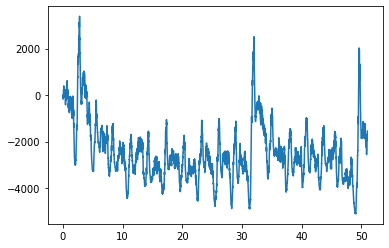

(6528,)
 VIDEO:  2


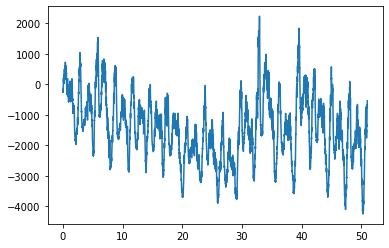

(6528,)
 VIDEO:  3


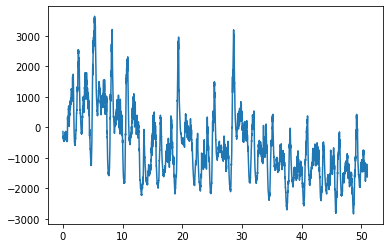

(6528,)
 VIDEO:  4


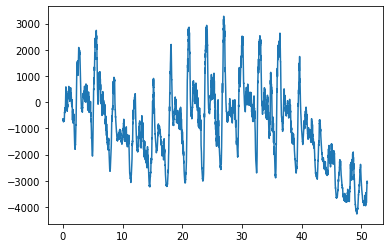

(6528,)
 VIDEO:  5


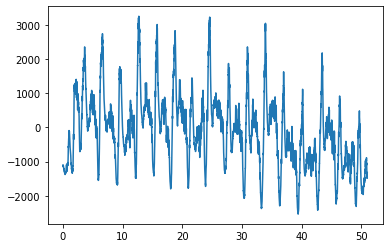

(6528,)
 VIDEO:  6


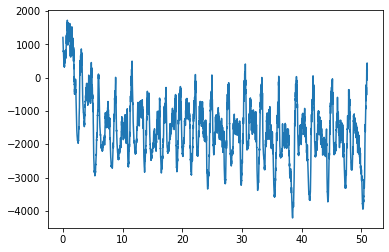

(6528,)
 VIDEO:  7


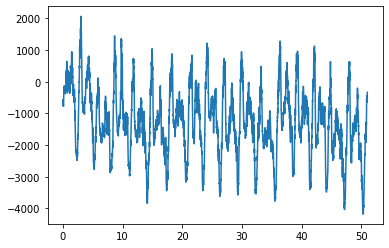

(6528,)
 VIDEO:  8


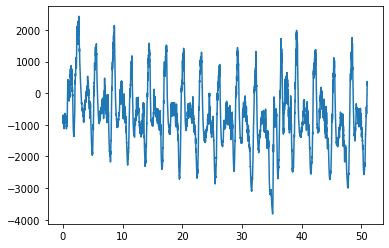

(6528,)
 VIDEO:  9


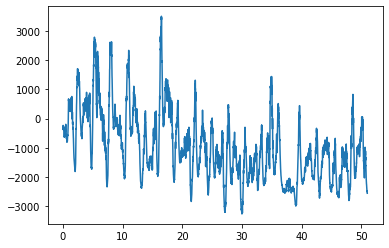

(6528,)
 VIDEO:  10


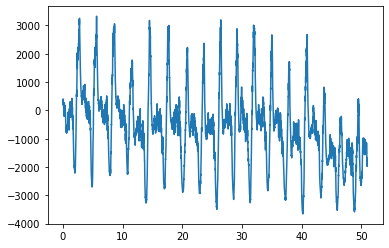

(6528,)
 VIDEO:  11


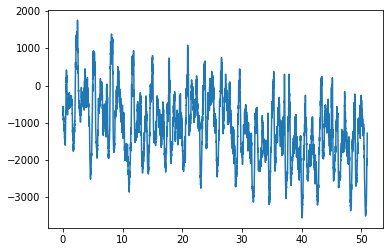

(6528,)
 VIDEO:  12


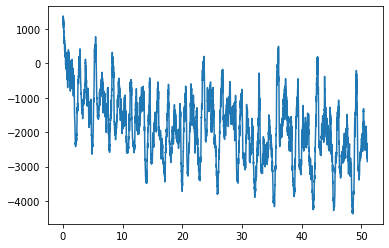

(6528,)
 VIDEO:  13


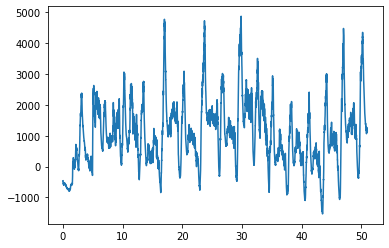

(6528,)
 VIDEO:  14


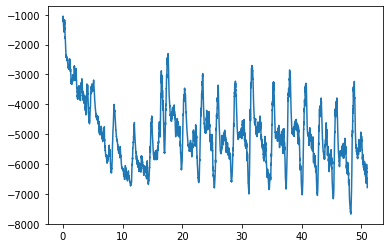

(6528,)
 VIDEO:  15


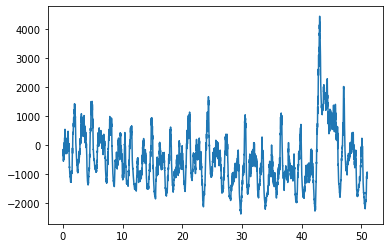

(6528,)
 VIDEO:  16


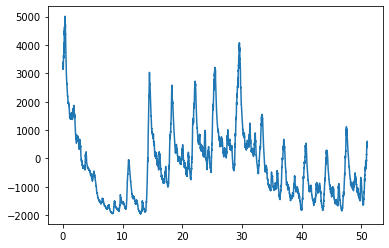

(6528,)
 VIDEO:  17


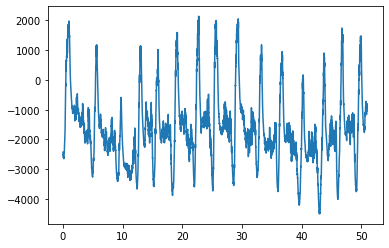

(6528,)
 VIDEO:  18


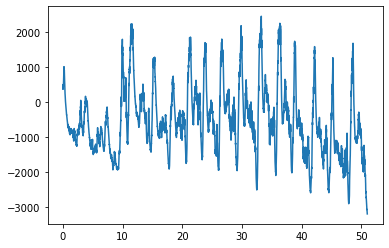

(6528,)
 VIDEO:  19


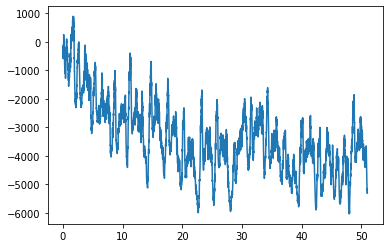

(6528,)
 VIDEO:  20


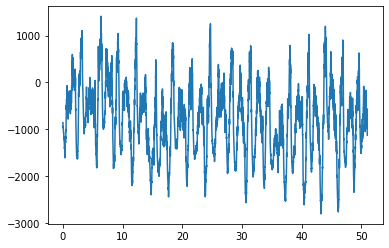

(6528,)
 VIDEO:  21


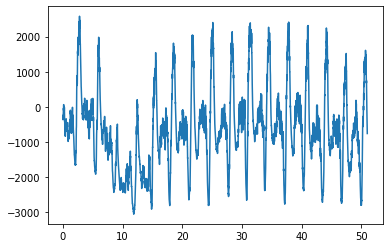

(6528,)
 VIDEO:  22


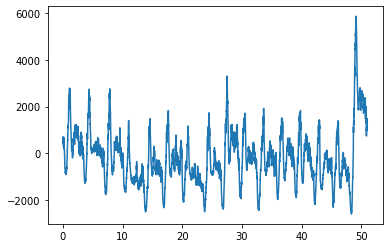

(6528,)
 VIDEO:  23


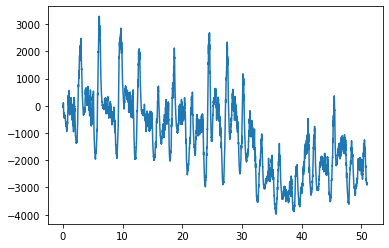

(6528,)
 VIDEO:  24


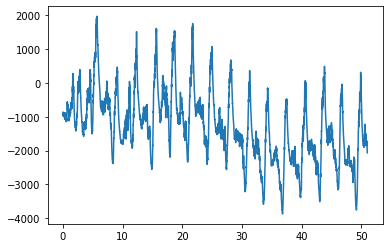

(6528,)
 VIDEO:  25


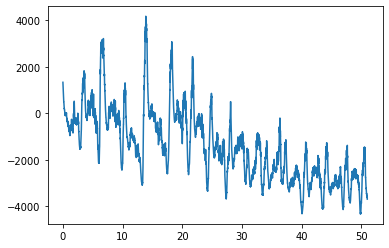

(6528,)
 VIDEO:  26


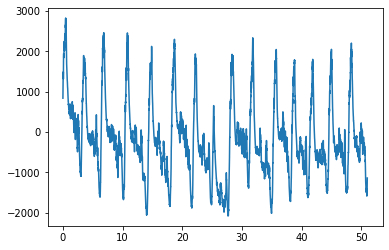

(6528,)
 VIDEO:  27


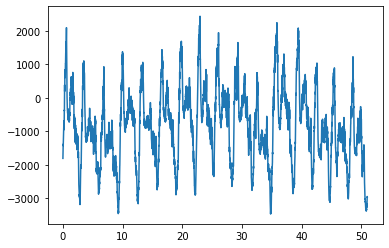

(6528,)
 VIDEO:  28


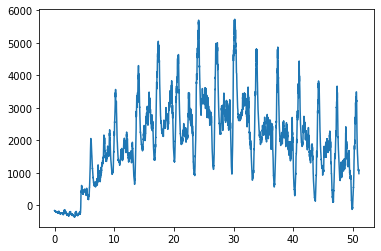

(6528,)
 VIDEO:  29


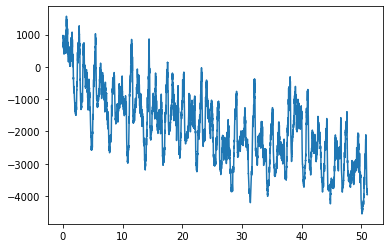

(6528,)
 VIDEO:  30


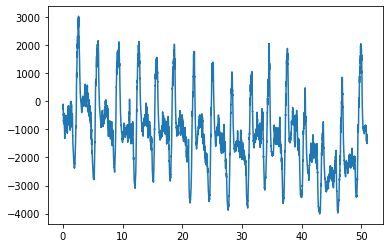

(6528,)
 VIDEO:  31


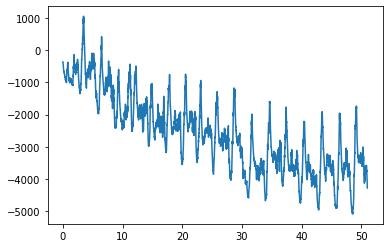

(6528,)
 VIDEO:  32


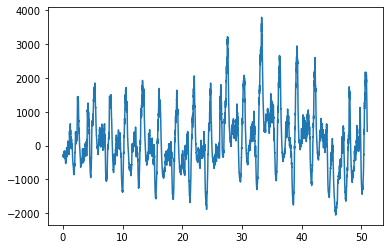

(6528,)
 VIDEO:  33


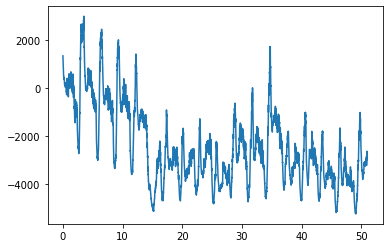

(6528,)
 VIDEO:  34


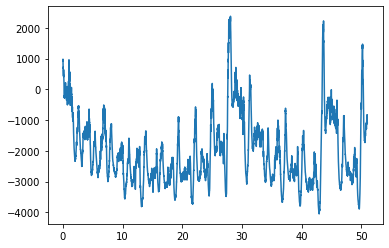

(6528,)
 VIDEO:  35


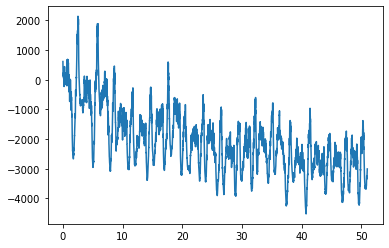

(6528,)
 VIDEO:  36


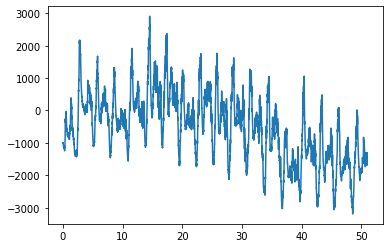

(6528,)
 VIDEO:  37


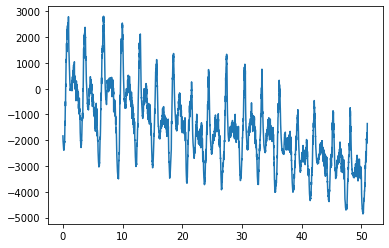

(6528,)
 VIDEO:  38


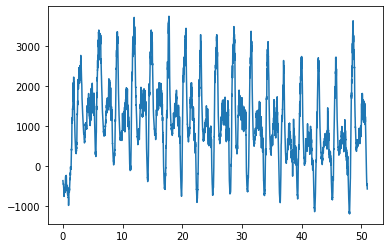

(6528,)
 VIDEO:  39


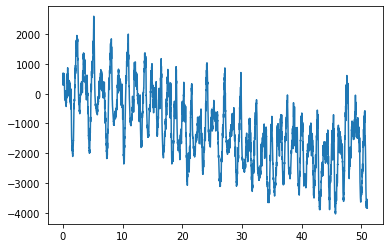

(6528,)
 VIDEO:  40


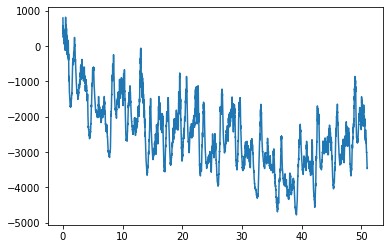

In [10]:
for j in range(40):
  signal_Respiracion = signalRespiracion(j)
  print(signal_Respiracion.shape)
  ts = len(signal_Respiracion)/128.
  time = np.linspace(0,ts,len(signal_Respiracion))

  print(" VIDEO: ", j+1)
  plt.plot(time,signal_Respiracion)
  ##plt.ylabel('siemens')
  ##plt.xlabel('s' )
  plt.show()

**PRIMERA CARACTERISTICA**

**promedio de la señal de respiración**

In [11]:
promedio_Respiracion=[]
for i in range(40):
  signal_Respiracion = signalRespiracion(i)
  promedio_Respiracion.append(np.mean(signal_Respiracion))
  print("Promedio señal Respiracion", i+1, ":", promedio_Respiracion[i])



Promedio señal Respiracion 1 : -2475.1206037240336
Promedio señal Respiracion 2 : -1444.5593808344902
Promedio señal Respiracion 3 : -620.9697472124465
Promedio señal Respiracion 4 : -914.7117557687784
Promedio señal Respiracion 5 : -118.15633804926965
Promedio señal Respiracion 6 : -1554.433215614135
Promedio señal Respiracion 7 : -1255.864857404877
Promedio señal Respiracion 8 : -743.1324255154296
Promedio señal Respiracion 9 : -957.9983208152689
Promedio señal Respiracion 10 : -614.9400928746107
Promedio señal Respiracion 11 : -1160.0127300194363
Promedio señal Respiracion 12 : -1875.7589660947567
Promedio señal Respiracion 13 : 1051.0076704420774
Promedio señal Respiracion 14 : -5022.323229971941
Promedio señal Respiracion 15 : -508.6359608281082
Promedio señal Respiracion 16 : -257.89215905022917
Promedio señal Respiracion 17 : -1630.010727045795
Promedio señal Respiracion 18 : -544.6393649290538
Promedio señal Respiracion 19 : -3381.7455944102753
Promedio señal Respiracion 20 : -

**SEGUNDA CARACTERISTICA**

**Esta caracteristica muestra el promedio de la derivada de la señal Respiration**

In [12]:
promedio_Derivada_Respiracion=[]

for j in range(40):
  signal_Respiracion = signalRespiracion(j)
  derivada = np.diff(signal_Respiracion)
  promedio_Derivada_Respiracion.append(np.mean(derivada))
  print("Promedio de la derivada de la señal Respiration", j+1, ":", promedio_Derivada_Respiracion[j])


 

Promedio de la derivada de la señal Respiration 1 : -0.22473434037813994
Promedio de la derivada de la señal Respiration 2 : -0.05680719547895481
Promedio de la derivada de la señal Respiration 3 : -0.22825337018657113
Promedio de la derivada de la señal Respiration 4 : -0.37332357861575793
Promedio de la derivada de la señal Respiration 5 : -0.03274373450320863
Promedio de la derivada de la señal Respiration 6 : -0.1479907637804029
Promedio de la derivada de la señal Respiration 7 : 0.037876251448294644
Promedio de la derivada de la señal Respiration 8 : 0.1495180705952186
Promedio de la derivada de la señal Respiration 9 : -0.3384013970882835
Promedio de la derivada de la señal Respiration 10 : -0.30960280620704284
Promedio de la derivada de la señal Respiration 11 : -0.07422040828611473
Promedio de la derivada de la señal Respiration 12 : -0.6411385043221434
Promedio de la derivada de la señal Respiration 13 : 0.24441218053140593
Promedio de la derivada de la señal Respiration 14 : 

**TERCERA CARACTERISTICA:**

**Esta caracteristica muestra la Desviación Estándar de cada señal de respiracion**

In [13]:
desviacion_Respiracion=[]

for i in range(40):
  signal_Respiracion = signalRespiracion(i)
  desviacion_Respiracion.append(np.std(signal_Respiracion))
  print("Desviacion estandar de la señal Respiracion", i+1, ":", desviacion_Respiracion[i])

Desviacion estandar de la señal Respiracion 1 : 1243.0485584616788
Desviacion estandar de la señal Respiracion 2 : 1072.4241272523873
Desviacion estandar de la señal Respiracion 3 : 1106.0216406069915
Desviacion estandar de la señal Respiracion 4 : 1489.9344797019676
Desviacion estandar de la señal Respiracion 5 : 1052.6513685125703
Desviacion estandar de la señal Respiracion 6 : 956.0715391846501
Desviacion estandar de la señal Respiracion 7 : 1063.3098344695347
Desviacion estandar de la señal Respiracion 8 : 1006.7541017348346
Desviacion estandar de la señal Respiracion 9 : 1169.1488456657808
Desviacion estandar de la señal Respiracion 10 : 1329.5575720999684
Desviacion estandar de la señal Respiracion 11 : 874.6464866312125
Desviacion estandar de la señal Respiracion 12 : 967.0403087516845
Desviacion estandar de la señal Respiracion 13 : 1062.7264136165609
Desviacion estandar de la señal Respiracion 14 : 1078.2567225849953
Desviacion estandar de la señal Respiracion 15 : 906.3857954

**Se procede a graficar las respuestas de Temperatura de la piel del sujeto 13 a los 40 videos**

(6528,)
 VIDEO:  1


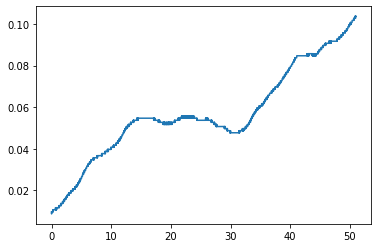

(6528,)
 VIDEO:  2


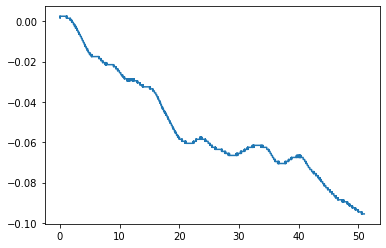

(6528,)
 VIDEO:  3


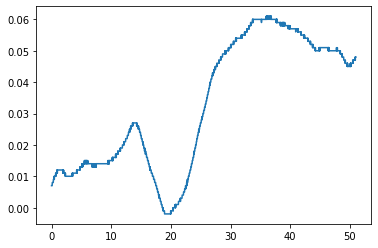

(6528,)
 VIDEO:  4


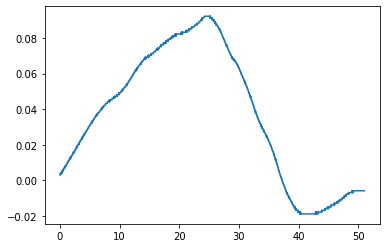

(6528,)
 VIDEO:  5


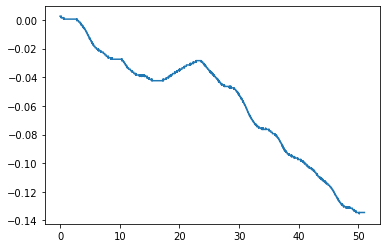

(6528,)
 VIDEO:  6


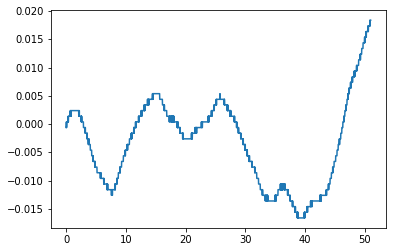

(6528,)
 VIDEO:  7


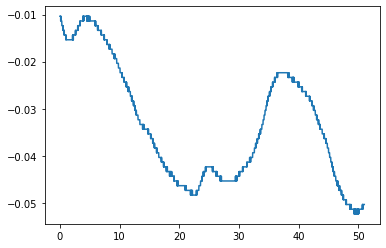

(6528,)
 VIDEO:  8


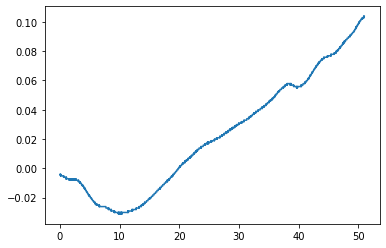

(6528,)
 VIDEO:  9


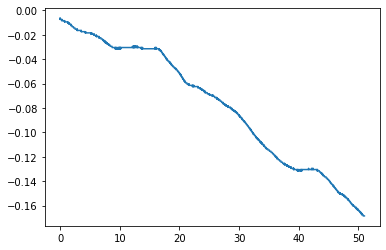

(6528,)
 VIDEO:  10


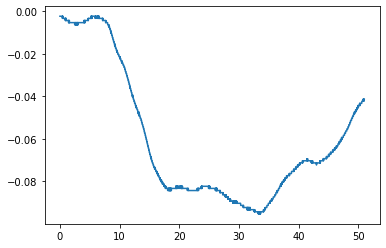

(6528,)
 VIDEO:  11


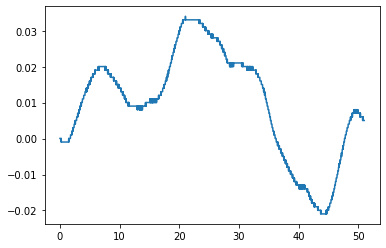

(6528,)
 VIDEO:  12


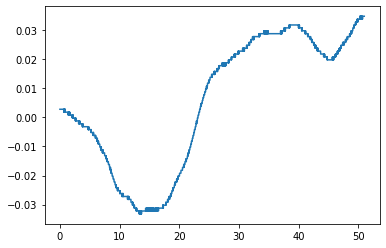

(6528,)
 VIDEO:  13


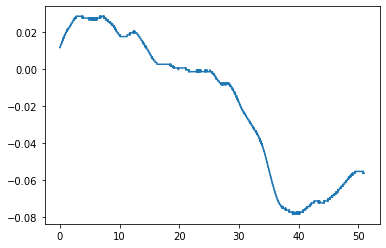

(6528,)
 VIDEO:  14


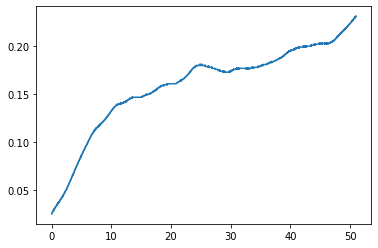

(6528,)
 VIDEO:  15


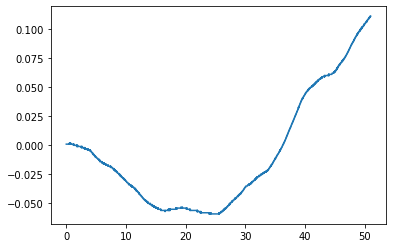

(6528,)
 VIDEO:  16


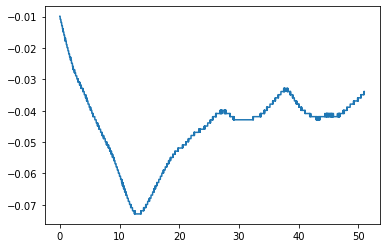

(6528,)
 VIDEO:  17


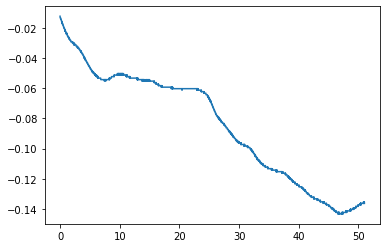

(6528,)
 VIDEO:  18


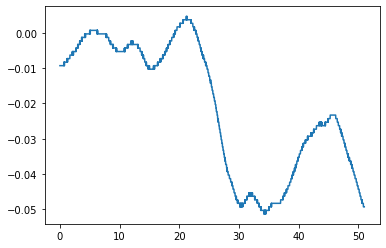

(6528,)
 VIDEO:  19


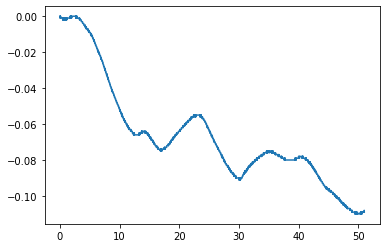

(6528,)
 VIDEO:  20


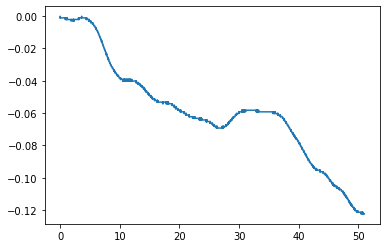

(6528,)
 VIDEO:  21


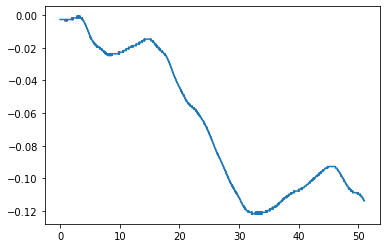

(6528,)
 VIDEO:  22


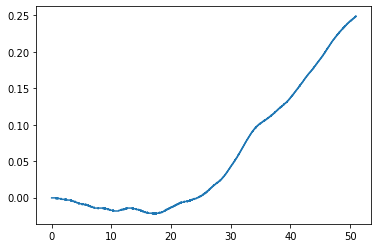

(6528,)
 VIDEO:  23


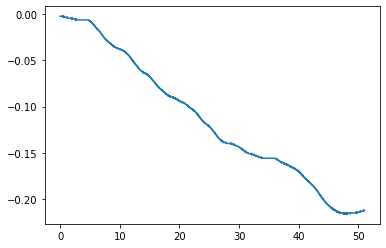

(6528,)
 VIDEO:  24


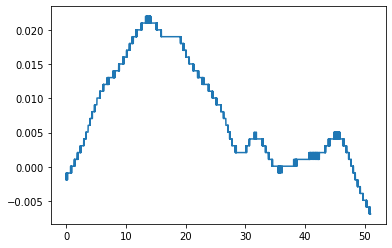

(6528,)
 VIDEO:  25


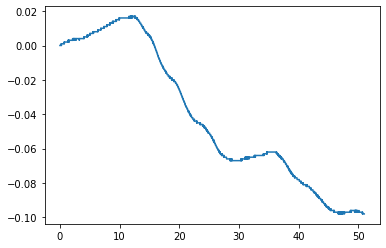

(6528,)
 VIDEO:  26


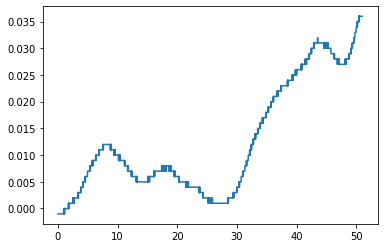

(6528,)
 VIDEO:  27


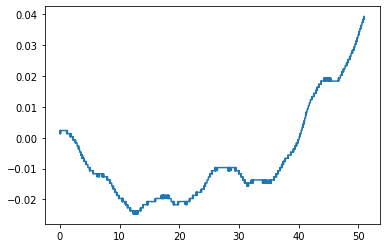

(6528,)
 VIDEO:  28


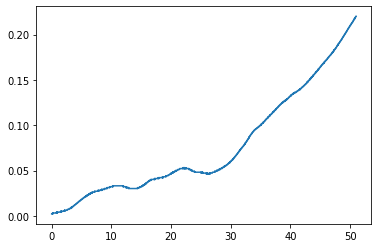

(6528,)
 VIDEO:  29


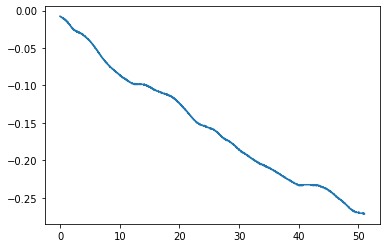

(6528,)
 VIDEO:  30


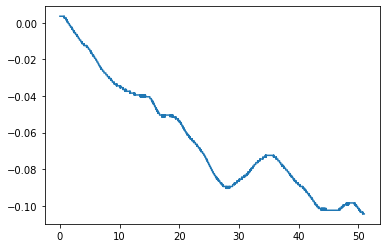

(6528,)
 VIDEO:  31


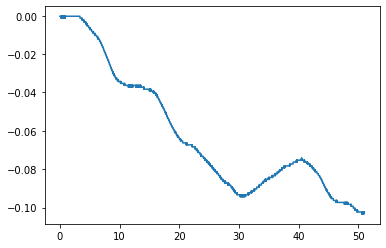

(6528,)
 VIDEO:  32


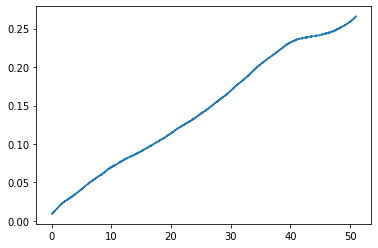

(6528,)
 VIDEO:  33


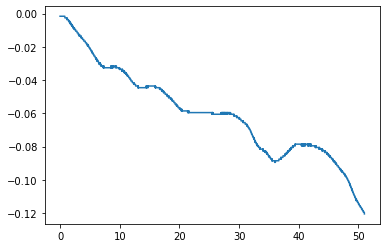

(6528,)
 VIDEO:  34


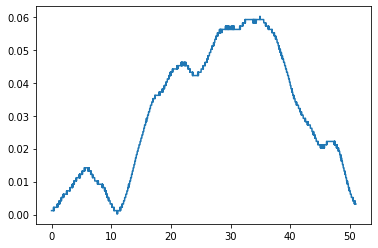

(6528,)
 VIDEO:  35


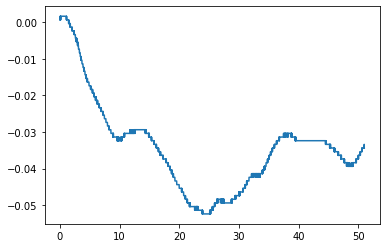

(6528,)
 VIDEO:  36


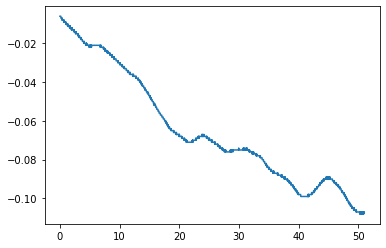

(6528,)
 VIDEO:  37


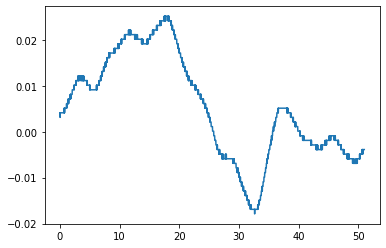

(6528,)
 VIDEO:  38


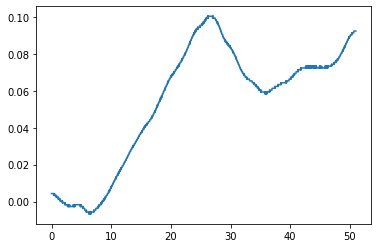

(6528,)
 VIDEO:  39


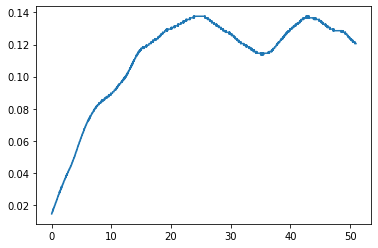

(6528,)
 VIDEO:  40


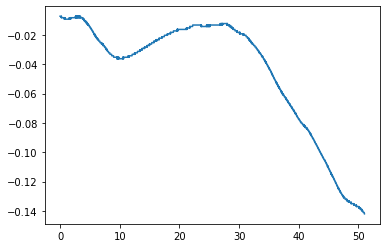

In [14]:
for j in range(40):
  signal_temperatura = signalTemperatura(j)
  print(signal_temperatura.shape)
  ts = len(signal_temperatura)/128.
  time = np.linspace(0,ts,len(signal_temperatura))

  print(" VIDEO: ", j+1)
  plt.plot(time,signal_temperatura)
  ##plt.ylabel('siemens')
  ##plt.xlabel('s' )
  plt.show()

**PRIMERA CARACTERISTICA**

**promedio de la señal de temperatura de la piel**

In [15]:
promedio_Tempetatura=[]
for j in range(40):
  signal_temperatura = signalTemperatura(j)
  promedio_Tempetatura.append(np.mean(signal_temperatura))
  print("Promedio señal de temperatura de la piel", j+1, ":", promedio_Tempetatura[j])

Promedio señal de temperatura de la piel 1 : 0.056763825258435596
Promedio señal de temperatura de la piel 2 : -0.052602573438404805
Promedio señal de temperatura de la piel 3 : 0.03275111215198158
Promedio señal de temperatura de la piel 4 : 0.03658301770219098
Promedio señal de temperatura de la piel 5 : -0.05819395399009151
Promedio señal de temperatura de la piel 6 : -0.0033761822237507746
Promedio señal de temperatura de la piel 7 : -0.03328771679486127
Promedio señal de temperatura de la piel 8 : 0.021894020895328554
Promedio señal de temperatura de la piel 9 : -0.0773916246351609
Promedio señal de temperatura de la piel 10 : -0.06010446872211528
Promedio señal de temperatura de la piel 11 : 0.009742062653941628
Promedio señal de temperatura de la piel 12 : 0.005439574898904717
Promedio señal de temperatura de la piel 13 : -0.018824513662772067
Promedio señal de temperatura de la piel 14 : 0.1591655460518329
Promedio señal de temperatura de la piel 15 : -0.007434953739251374
Prom

**SEGUNDA CARACTERISTICA**

**Esta caracteristica muestra el promedio de la derivada de la señal Temperatura de la piel**

In [16]:
promedio_Derivada_Temperatura=[]
for j in range(40):
  signal_temperatura = signalTemperatura(j)
  derivada = np.diff(signal_temperatura)
  promedio_Derivada_Temperatura.append(np.mean(derivada))
  print("Promedio de la derivada de la señal Temperatura de la piel", j+1, ":", promedio_Derivada_Temperatura[j] )

Promedio de la derivada de la señal Temperatura de la piel 1 : 1.4401531391153202e-05
Promedio de la derivada de la señal Temperatura de la piel 2 : -1.5014362514181543e-05
Promedio de la derivada de la señal Temperatura de la piel 3 : 6.2815190110349074e-06
Promedio de la derivada de la señal Temperatura de la piel 4 : -1.3788700268125407e-06
Promedio de la derivada de la señal Temperatura de la piel 5 : -2.098946596370201e-05
Promedio de la derivada de la señal Temperatura de la piel 6 : 2.9109478343820305e-06
Promedio de la derivada de la señal Temperatura de la piel 7 : -6.128311230277959e-06
Promedio de la derivada de la señal Temperatura de la piel 8 : 1.6546440321750487e-05
Promedio de la derivada de la señal Temperatura de la piel 9 : -2.4819660482625732e-05
Promedio de la derivada de la señal Temperatura de la piel 10 : -5.97510344952101e-06
Promedio de la derivada de la señal Temperatura de la piel 11 : 7.660389037847448e-07
Promedio de la derivada de la señal Temperatura de 

**TERCERA CARACTERISTICA:**

**Esta caracteristica muestra la  densidad espectral de potencia en las bandas ([0-0.1]Hz, [0.1-0.2]Hz)**

In [21]:
sumatoria1=[]
fs=128   ## frecuencia de muestreo
fn=fs/2
flow=0/fn
fhigh=0.1/fn
sos2 = scipy.signal.butter(5, [flow,fhigh], btype='bandpass',analog=True, output='sos')

for i in range(40):
  signal_temperatura = signalTemperatura(i)
  filtered2 = scipy.signal.sosfilt(sos2, signal_temperatura) #señal filtrada con la banda [0-0.1]
  f2, DSP2 = scipy.signal.welch(filtered2, fs, nperseg=64)
  sumatoria1.append(np.sum(DSP2))
  
  print("potencia espectral total de la señal Temperatura en la banda [0-0.1]Hz ", i+1, "es:", sumatoria1[i])

potencia espectral total de la señal Temperatura en la banda [0-0.1]Hz  1 es: 5.4158495754464916e-36
potencia espectral total de la señal Temperatura en la banda [0-0.1]Hz  2 es: 5.536708734783921e-36
potencia espectral total de la señal Temperatura en la banda [0-0.1]Hz  3 es: 6.091858107978979e-36
potencia espectral total de la señal Temperatura en la banda [0-0.1]Hz  4 es: 8.816262210852139e-36
potencia espectral total de la señal Temperatura en la banda [0-0.1]Hz  5 es: 6.808611312418821e-36
potencia espectral total de la señal Temperatura en la banda [0-0.1]Hz  6 es: 4.890966115166219e-36
potencia espectral total de la señal Temperatura en la banda [0-0.1]Hz  7 es: 4.8545760891074465e-36
potencia espectral total de la señal Temperatura en la banda [0-0.1]Hz  8 es: 7.01718939727541e-36
potencia espectral total de la señal Temperatura en la banda [0-0.1]Hz  9 es: 6.789277669433522e-36
potencia espectral total de la señal Temperatura en la banda [0-0.1]Hz  10 es: 7.699794914431078e-3

In [22]:
sumatoria2=[]
fs=128   ## frecuencia de muestreo
fn=fs/2
flow=0.1/fn
fhigh=0.2/fn
sos3 = scipy.signal.butter(5, [flow,fhigh], btype='bandpass',analog=True, output='sos')

for i in range(40):
  signal_temperatura = signalTemperatura(i)
  filtered3 = scipy.signal.sosfilt(sos3, signal_temperatura) #señal filtrada con la banda [0.1-0.2]
  f3, DSP3 = scipy.signal.welch(filtered3, fs, nperseg=64)
  sumatoria2.append(np.sum(DSP3))
  # sumatoria.append(np.sum(f1))
  print("potencia espectral total de la señal Temperatura en la banda [0-0.1]Hz ", i+1, "es:", sumatoria2[i])

potencia espectral total de la señal Temperatura en la banda [0-0.1]Hz  1 es: 5.415718311893911e-36
potencia espectral total de la señal Temperatura en la banda [0-0.1]Hz  2 es: 5.536549640097964e-36
potencia espectral total de la señal Temperatura en la banda [0-0.1]Hz  3 es: 6.091663039742469e-36
potencia espectral total de la señal Temperatura en la banda [0-0.1]Hz  4 es: 8.815938479759697e-36
potencia espectral total de la señal Temperatura en la banda [0-0.1]Hz  5 es: 6.80838076938583e-36
potencia espectral total de la señal Temperatura en la banda [0-0.1]Hz  6 es: 4.890825620937633e-36
potencia espectral total de la señal Temperatura en la banda [0-0.1]Hz  7 es: 4.8544389925867404e-36
potencia espectral total de la señal Temperatura en la banda [0-0.1]Hz  8 es: 7.016964933728411e-36
potencia espectral total de la señal Temperatura en la banda [0-0.1]Hz  9 es: 6.78905984029609e-36
potencia espectral total de la señal Temperatura en la banda [0-0.1]Hz  10 es: 7.69954706872051e-36
p

**Se procede a graficar la presion en el volumen de la sangre del sujeto 13 a los 40 videos**

(6528,)
 VIDEO:  1


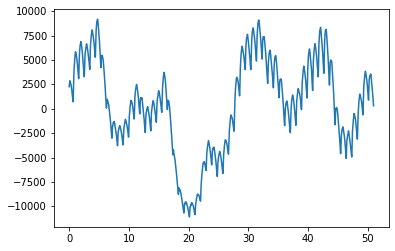

(6528,)
 VIDEO:  2


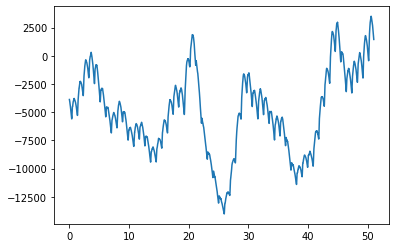

(6528,)
 VIDEO:  3


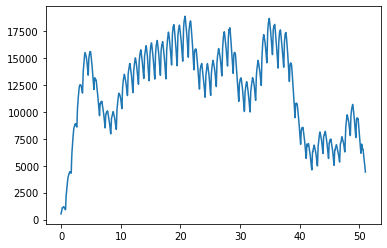

(6528,)
 VIDEO:  4


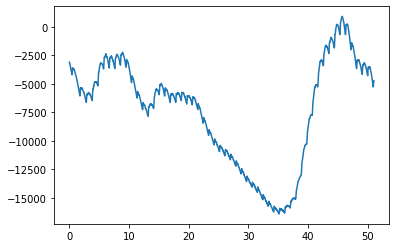

(6528,)
 VIDEO:  5


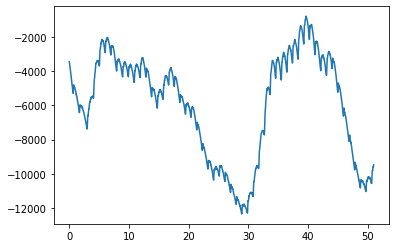

(6528,)
 VIDEO:  6


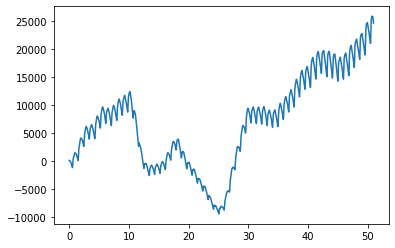

(6528,)
 VIDEO:  7


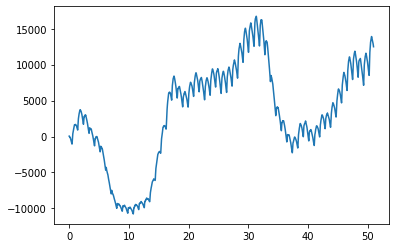

(6528,)
 VIDEO:  8


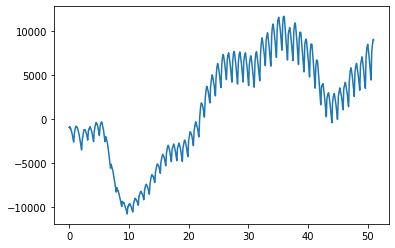

(6528,)
 VIDEO:  9


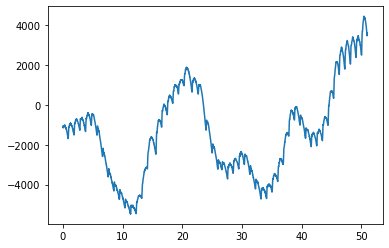

(6528,)
 VIDEO:  10


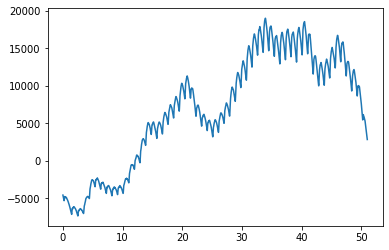

(6528,)
 VIDEO:  11


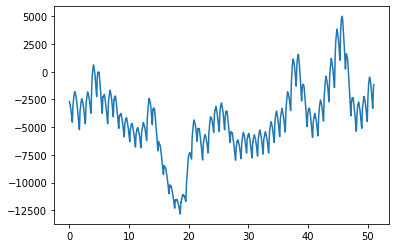

(6528,)
 VIDEO:  12


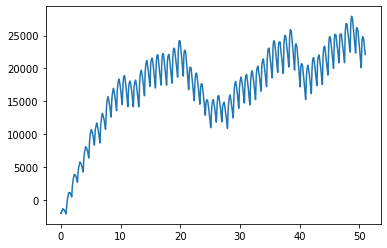

(6528,)
 VIDEO:  13


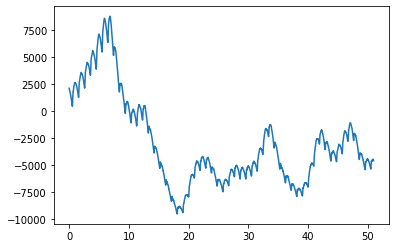

(6528,)
 VIDEO:  14


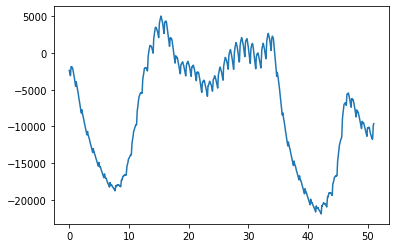

(6528,)
 VIDEO:  15


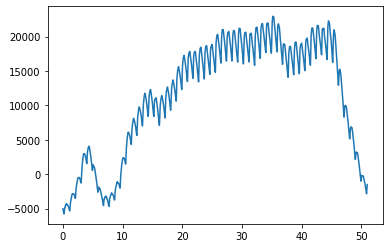

(6528,)
 VIDEO:  16


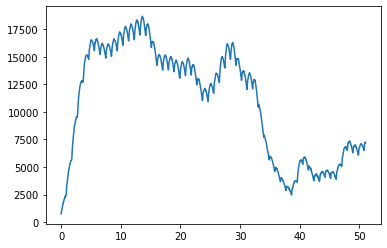

(6528,)
 VIDEO:  17


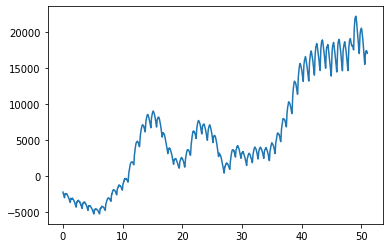

(6528,)
 VIDEO:  18


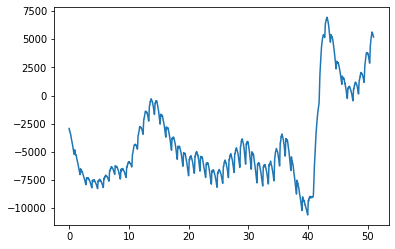

(6528,)
 VIDEO:  19


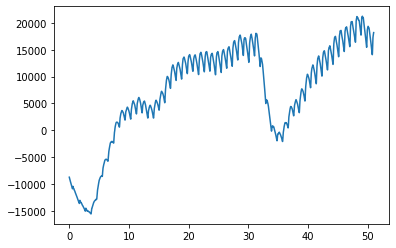

(6528,)
 VIDEO:  20


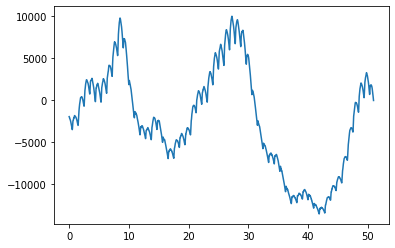

(6528,)
 VIDEO:  21


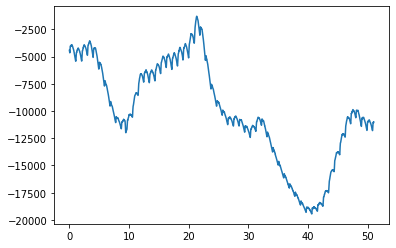

(6528,)
 VIDEO:  22


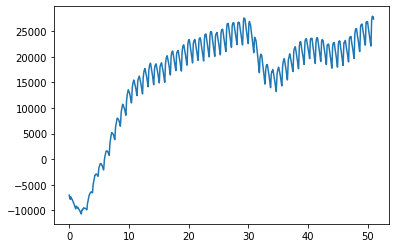

(6528,)
 VIDEO:  23


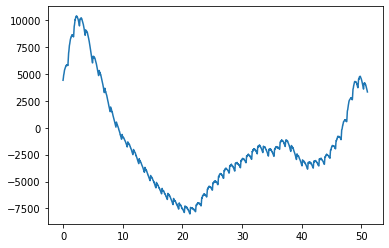

(6528,)
 VIDEO:  24


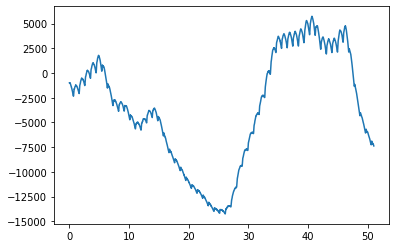

(6528,)
 VIDEO:  25


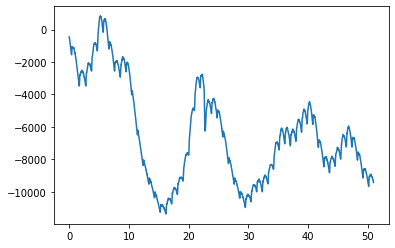

(6528,)
 VIDEO:  26


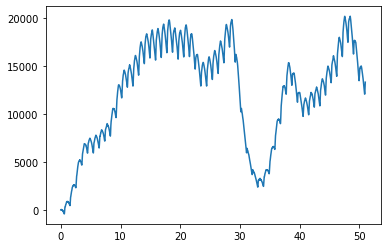

(6528,)
 VIDEO:  27


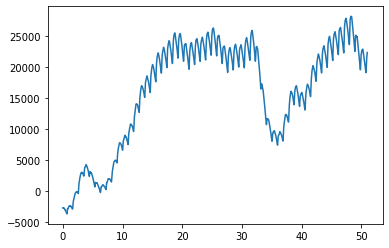

(6528,)
 VIDEO:  28


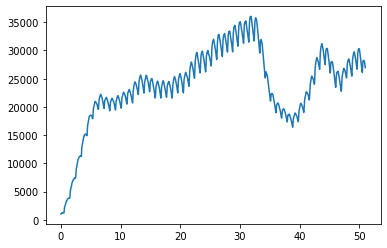

(6528,)
 VIDEO:  29


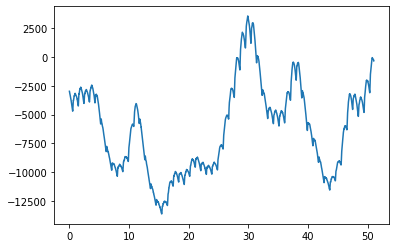

(6528,)
 VIDEO:  30


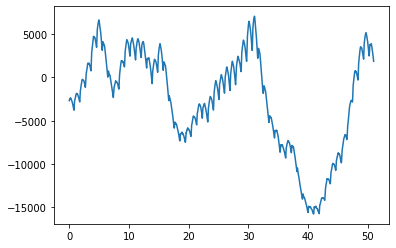

(6528,)
 VIDEO:  31


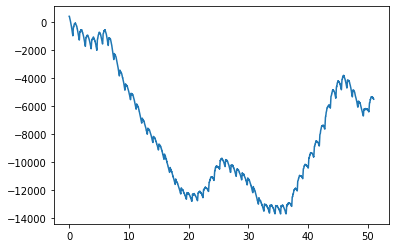

(6528,)
 VIDEO:  32


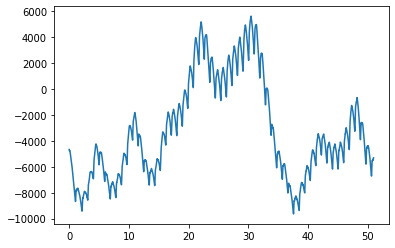

(6528,)
 VIDEO:  33


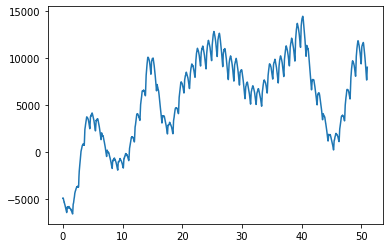

(6528,)
 VIDEO:  34


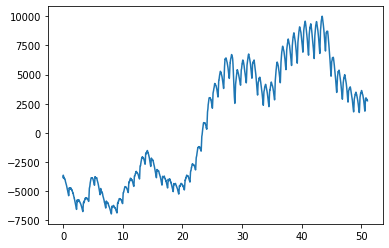

(6528,)
 VIDEO:  35


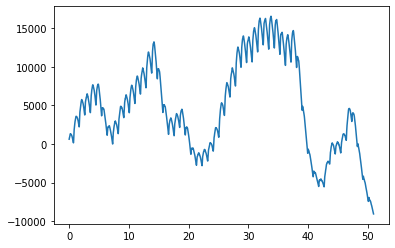

(6528,)
 VIDEO:  36


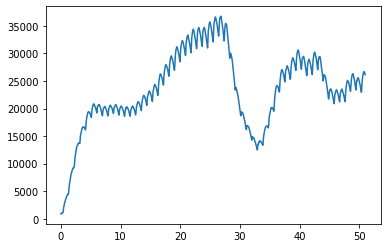

(6528,)
 VIDEO:  37


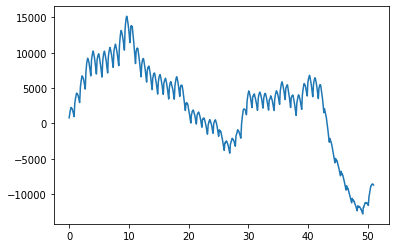

(6528,)
 VIDEO:  38


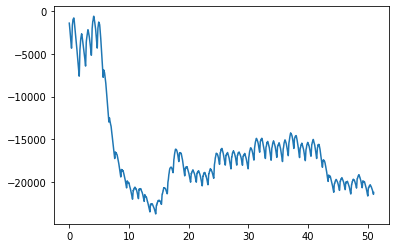

(6528,)
 VIDEO:  39


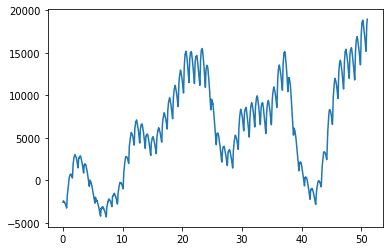

(6528,)
 VIDEO:  40


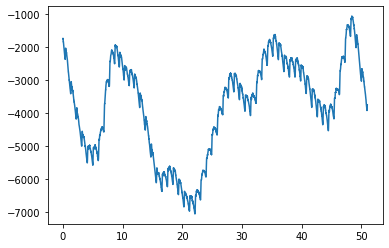

In [23]:
for i in range(40):
  signal_volumensangre = signalVolumensangre(i)
  print(signal_volumensangre.shape)
  ts = len(signal_volumensangre)/128.
  time = np.linspace(0,ts,len(signal_volumensangre))

  print(" VIDEO: ", i+1)
  plt.plot(time,signal_volumensangre)
  ##plt.ylabel('siemens')
  ##plt.xlabel('s' )
  plt.show()

**PRIMERA CARACTERISTICA**

**Esta caracteristica muestra la Desviacion estandar HR**

In [24]:
desviacion_Volumensangre=[]
for i in range(40):
  signal_volumensangre = signalVolumensangre(i)
  desviacion_Volumensangre.append(np.std(signal_volumensangre))
  print("Desviacion estandar HR de la señal Presion volumen en la sangre", i+1, ":", desviacion_Volumensangre[i])

Desviacion estandar HR de la señal Presion volumen en la sangre 1 : 4768.34480660757
Desviacion estandar HR de la señal Presion volumen en la sangre 2 : 3708.1976796114236
Desviacion estandar HR de la señal Presion volumen en la sangre 3 : 4002.8345692005378
Desviacion estandar HR de la señal Presion volumen en la sangre 4 : 4655.314161636859
Desviacion estandar HR de la señal Presion volumen en la sangre 5 : 3028.097455760618
Desviacion estandar HR de la señal Presion volumen en la sangre 6 : 8341.553898643648
Desviacion estandar HR de la señal Presion volumen en la sangre 7 : 6991.7298365961715
Desviacion estandar HR de la señal Presion volumen en la sangre 8 : 5917.099807144291
Desviacion estandar HR de la señal Presion volumen en la sangre 9 : 2275.5778662479247
Desviacion estandar HR de la señal Presion volumen en la sangre 10 : 7530.713098110776
Desviacion estandar HR de la señal Presion volumen en la sangre 11 : 3089.427134352485
Desviacion estandar HR de la señal Presion volume

**SEGUNDA CARACTERISTICA**

**Esta caracteristica muestra el promedio HR**

In [25]:
promedio_Volumensangre=[]
for j in range(40):
  signal_volumensangre = signalVolumensangre(j)
  promedio_Volumensangre.append(np.mean(signal_volumensangre))
  print("Promedio HR de la señal de Presion volumen en la sangre", j+1, ":", promedio_Volumensangre[j])

Promedio HR de la señal de Presion volumen en la sangre 1 : 517.6823787104103
Promedio HR de la señal de Presion volumen en la sangre 2 : -4923.452603491908
Promedio HR de la señal de Presion volumen en la sangre 3 : 12091.49685523548
Promedio HR de la señal de Presion volumen en la sangre 4 : -7362.058900107438
Promedio HR de la señal de Presion volumen en la sangre 5 : -5922.730125304955
Promedio HR de la señal de Presion volumen en la sangre 6 : 7085.4569372318
Promedio HR de la señal de Presion volumen en la sangre 7 : 3281.097581193529
Promedio HR de la señal de Presion volumen en la sangre 8 : 1416.066132081358
Promedio HR de la señal de Presion volumen en la sangre 9 : -1365.8628611967558
Promedio HR de la señal de Presion volumen en la sangre 10 : 6980.038632613134
Promedio HR de la señal de Presion volumen en la sangre 11 : -4264.342996855723
Promedio HR de la señal de Presion volumen en la sangre 12 : 17356.932469032377
Promedio HR de la señal de Presion volumen en la sangre 

**TERCERA CARACTERISTICA**

**Esta caracteristica muestra la relación de energía entre las bandas de frecuencia [0,04-0,15]Hz y [0,15-0,5]Hz.**

In [26]:
canal_BVP= 39
def relacion_energia(canal):
  fil_band1=[0.04,0.15] #banda 1
  fil_band2=[0.15,0.5] #banda 2
  r_energia=[]
  for video in range (40):
    señal = X[video,canal-1,:] #señal
    ts = len(señal)/128. #tiempo de muestreo
    time = np.linspace(0,ts,len(señal)) #tiemppo


    sos1 = scipy.signal.butter(5, fil_band1, btype='bandpass',analog=False, fs=128, output='sos') #filtro para la banda 1
    sos2 = scipy.signal.butter(5, fil_band2, btype='bandpass',analog=False, fs=128, output='sos') #filtro para la banda 2

    filtered1 = scipy.signal.sosfilt(sos1, señal) #señal filtrada con la banda 1
    filtered2 = scipy.signal.sosfilt(sos2, señal) #señal filtrada con la banda 2


    cuadrado1 = filtered1**2 # elevo al cuadrado la señal filtrada
    energia1 = integrate.simps(cuadrado1,time) #calculo la energia


    cuadrado2 = filtered2**2 # elevo al cuadrado la señal filtrada
    energia2 = integrate.simps(cuadrado2,time)#calculo la energia

    r_energia.append(energia1/energia2)
  return (r_energia)

In [29]:
R_energy_BVP=[]
R_energy_BVP=relacion_energia(canal_BVP)
print('energía entre las bandas de frecuencia [0,04-0,15]Hz y [0,15-0,5]Hz'+'\n')
for i in range(40):
  print('Video '+str(i+1)+': '+str(R_energy_BVP[i]))

energía entre las bandas de frecuencia [0,04-0,15]Hz y [0,15-0,5]Hz

Video 1: 7.996428833512005
Video 2: 7.620367643828468
Video 3: 11.743761438068034
Video 4: 10.664243046790157
Video 5: 6.832188919063262
Video 6: 14.611755291339662
Video 7: 18.85375198190949
Video 8: 14.142223319698275
Video 9: 34.854445605491165
Video 10: 10.304447794113125
Video 11: 3.1289134997922576
Video 12: 9.182085334950596
Video 13: 9.343561542907825
Video 14: 29.142314175714507
Video 15: 3.8790413973241176
Video 16: 24.103444141150245
Video 17: 15.152929028928037
Video 18: 6.35328156001594
Video 19: 15.479239837127425
Video 20: 8.702509228583404
Video 21: 9.533518580994766
Video 22: 15.395832529948542
Video 23: 16.16352587452602
Video 24: 7.3763611149071675
Video 25: 15.161845168342744
Video 26: 13.010489685513699
Video 27: 3.5373496654857393
Video 28: 27.856948251853204
Video 29: 6.050022833628431
Video 30: 4.239561945524915
Video 31: 31.647516900086448
Video 32: 3.3679365949990188
Video 33: 5.2022057218037

**Se procede a graficar la señal EMG  del sujeto 13 a los 40 videos**

(6528,)
 VIDEO:  1


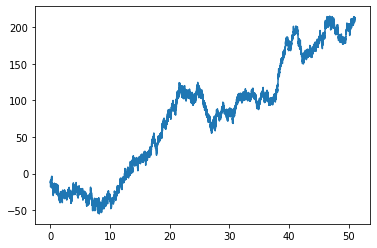

(6528,)
 VIDEO:  2


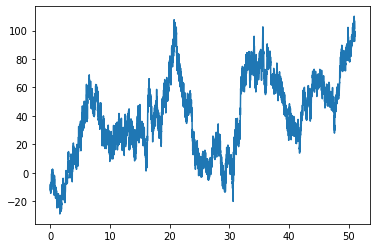

(6528,)
 VIDEO:  3


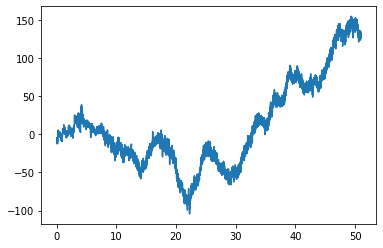

(6528,)
 VIDEO:  4


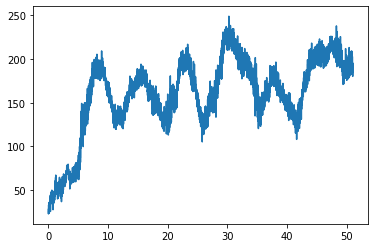

(6528,)
 VIDEO:  5


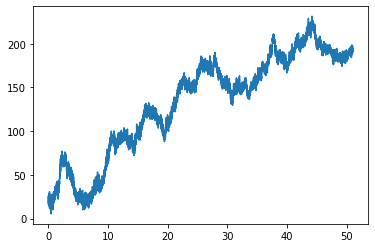

(6528,)
 VIDEO:  6


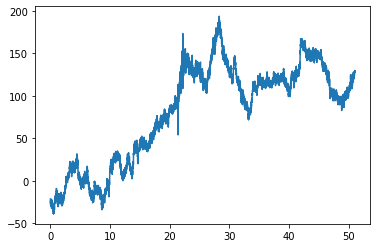

(6528,)
 VIDEO:  7


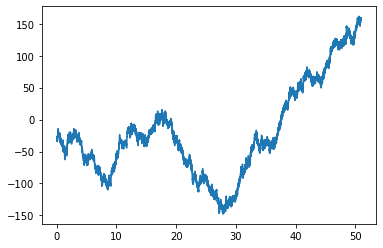

(6528,)
 VIDEO:  8


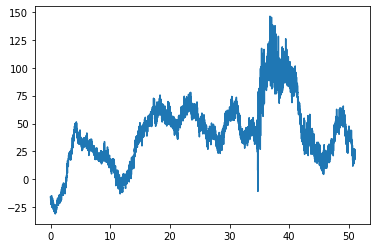

(6528,)
 VIDEO:  9


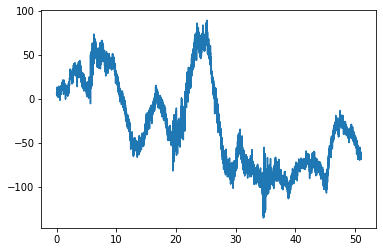

(6528,)
 VIDEO:  10


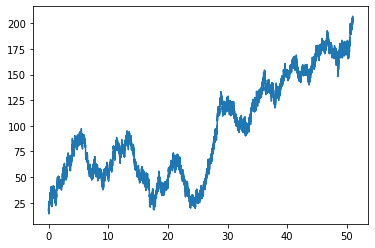

(6528,)
 VIDEO:  11


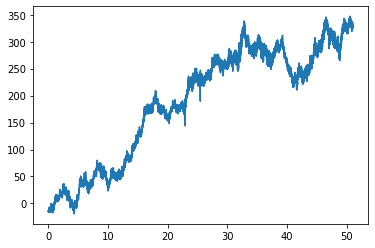

(6528,)
 VIDEO:  12


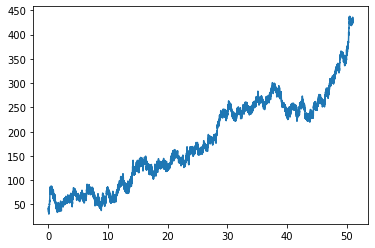

(6528,)
 VIDEO:  13


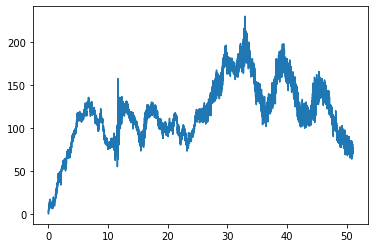

(6528,)
 VIDEO:  14


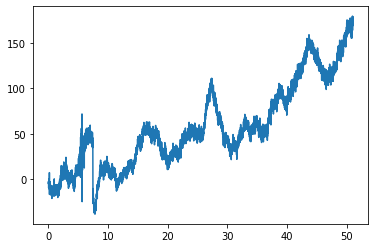

(6528,)
 VIDEO:  15


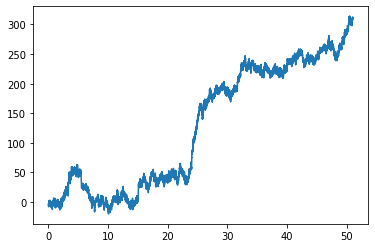

(6528,)
 VIDEO:  16


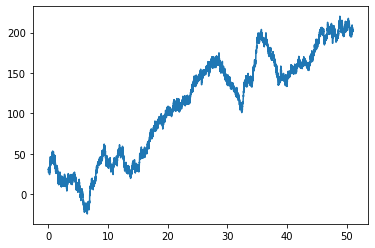

(6528,)
 VIDEO:  17


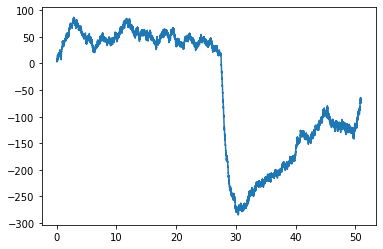

(6528,)
 VIDEO:  18


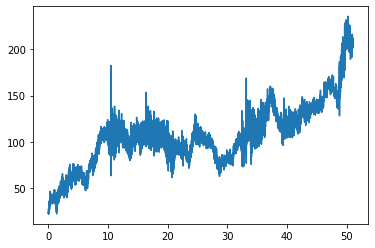

(6528,)
 VIDEO:  19


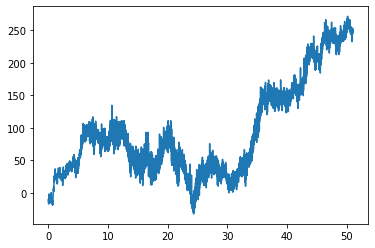

(6528,)
 VIDEO:  20


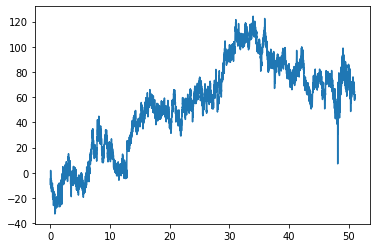

(6528,)
 VIDEO:  21


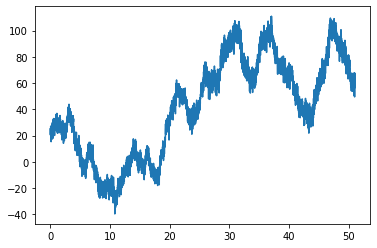

(6528,)
 VIDEO:  22


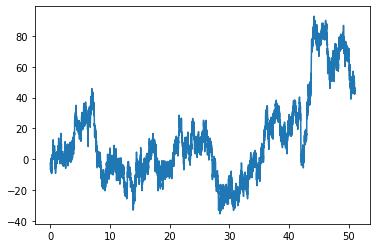

(6528,)
 VIDEO:  23


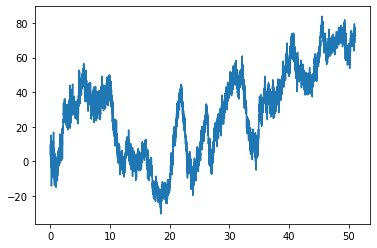

(6528,)
 VIDEO:  24


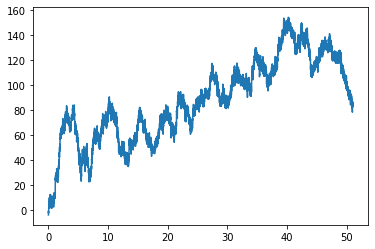

(6528,)
 VIDEO:  25


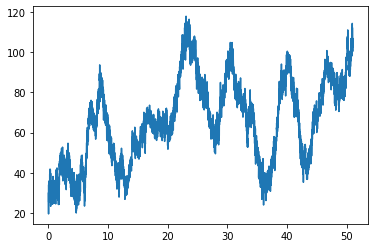

(6528,)
 VIDEO:  26


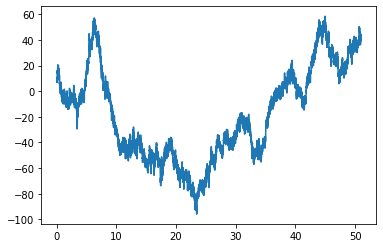

(6528,)
 VIDEO:  27


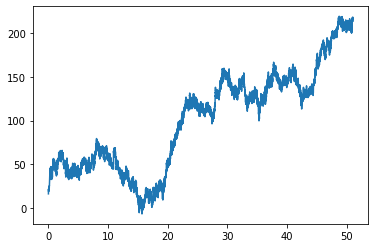

(6528,)
 VIDEO:  28


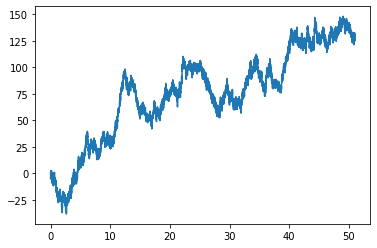

(6528,)
 VIDEO:  29


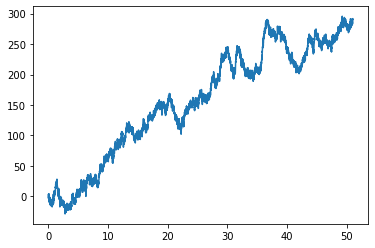

(6528,)
 VIDEO:  30


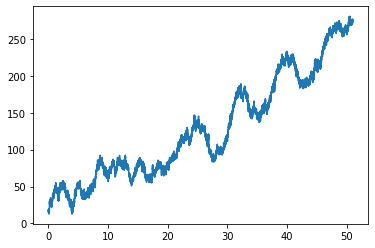

(6528,)
 VIDEO:  31


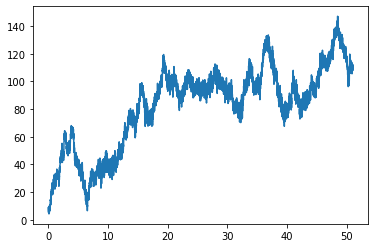

(6528,)
 VIDEO:  32


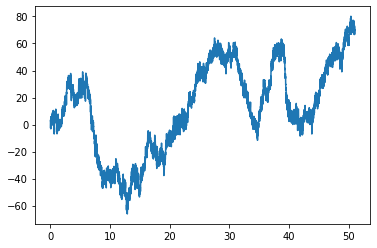

(6528,)
 VIDEO:  33


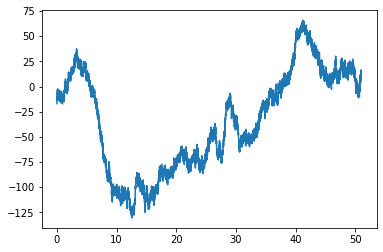

(6528,)
 VIDEO:  34


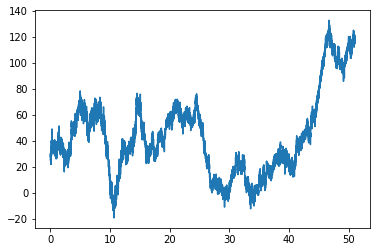

(6528,)
 VIDEO:  35


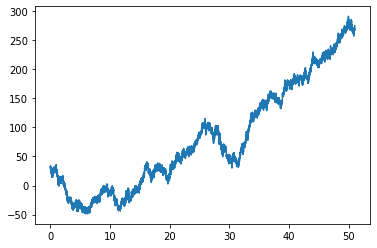

(6528,)
 VIDEO:  36


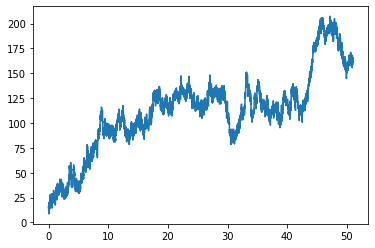

(6528,)
 VIDEO:  37


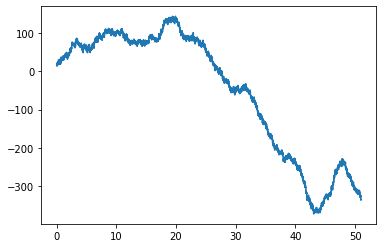

(6528,)
 VIDEO:  38


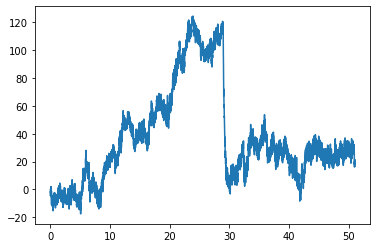

(6528,)
 VIDEO:  39


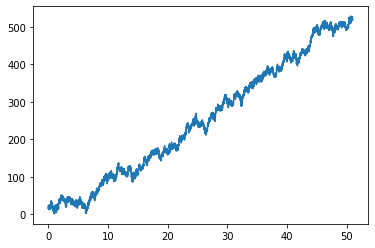

(6528,)
 VIDEO:  40


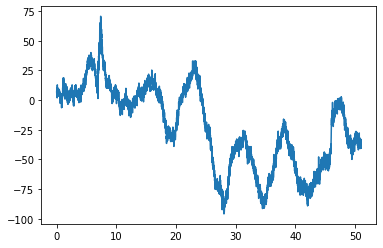

In [30]:

for i in range(40):
  signal_EMG = signalEMG(i)
  print(signal_EMG.shape)
  ts = len(signal_EMG)/128.
  time = np.linspace(0,ts,len(signal_EMG))

  print(" VIDEO: ", i+1)
  plt.plot(time,signal_EMG)
  #plt.ylabel('siemens')
  #plt.xlabel('s' )
  plt.show()

**PRIMERA CARACTERISTICA**

**Esta caracteristica muestra la varianza de la señal**

In [32]:
varianza_EMG=[]
for i in range(40):
  signal_EMG = signalEMG(i)
  varianza_EMG.append(np.var(signal_EMG))
  print("Varianza de la señal EMG", i+1, ":", varianza_EMG[i])

Varianza de la señal EMG 1 : 6252.158695604125
Varianza de la señal EMG 2 : 768.795028151229
Varianza de la señal EMG 3 : 3359.7258095891284
Varianza de la señal EMG 4 : 1913.6498578695387
Varianza de la señal EMG 5 : 3400.8859253306473
Varianza de la señal EMG 6 : 3364.801490036003
Varianza de la señal EMG 7 : 5313.713044633776
Varianza de la señal EMG 8 : 829.2200999991576
Varianza de la señal EMG 9 : 2499.1451060171494
Varianza de la señal EMG 10 : 2435.8622965559007
Varianza de la señal EMG 11 : 11164.267743873774
Varianza de la señal EMG 12 : 8392.270619564997
Varianza de la señal EMG 13 : 1339.5903619661754
Varianza de la señal EMG 14 : 2200.688276170112
Varianza de la señal EMG 15 : 11033.390732016147
Varianza de la señal EMG 16 : 4299.011092327476
Varianza de la señal EMG 17 : 13641.676459934897
Varianza de la señal EMG 18 : 1191.2215577980485
Varianza de la señal EMG 19 : 5378.59950732849
Varianza de la señal EMG 20 : 1273.4522338330455
Varianza de la señal EMG 21 : 1379.08366

**SEGUNDA CARACTERISTICA**

**Esta caracteristica muestra la media de la señal**

In [33]:
promedio_EMG=[]
for i in range(40):
  signal_EMG = signalEMG(i)
  promedio_EMG.append(np.mean(signal_EMG))
  print("Promedio señal EMG", i+1, ":", promedio_EMG[i])

Promedio señal EMG 1 : 77.99549007520208
Promedio señal EMG 2 : 39.92851748283955
Promedio señal EMG 3 : 11.547820650864999
Promedio señal EMG 4 : 159.07776404554377
Promedio señal EMG 5 : 132.31600379001287
Promedio señal EMG 6 : 81.45791953064251
Promedio señal EMG 7 : -20.257779855881942
Promedio señal EMG 8 : 42.57967871479112
Promedio señal EMG 9 : -29.32548100855517
Promedio señal EMG 10 : 95.30457363308878
Promedio señal EMG 11 : 188.15954050272674
Promedio señal EMG 12 : 179.32960794419313
Promedio señal EMG 13 : 116.5935106292048
Promedio señal EMG 14 : 56.905919859993666
Promedio señal EMG 15 : 127.50804603023313
Promedio señal EMG 16 : 110.6424024082432
Promedio señal EMG 17 : -52.820152669793615
Promedio señal EMG 18 : 106.51901369609142
Promedio señal EMG 19 : 93.56125960566469
Promedio señal EMG 20 : 53.78225643732539
Promedio señal EMG 21 : 41.99111898720528
Promedio señal EMG 22 : 12.949213971421381
Promedio señal EMG 23 : 28.441913783898553
Promedio señal EMG 24 : 87.5

**TERCERA CARACTERISTICA**

**Esta caracteristica muestra la energia de la señal**

In [35]:
canal_EMG = 35
def energia_señal(canal):
 
  energia_señal=[]
  
  for video in range (40):
    señal = X[video,canal-1,:] 
    ts = len(señal)/128.
    time = np.linspace(0,ts,len(señal)) 

    cuadrado=señal**2
    energia = integrate.simps(cuadrado,time)
    energia_señal.append(energia)
  return (energia_señal)

In [36]:
energia_EMG=[]
energia_EMG=energia_señal(canal_EMG)
print('Energia: '+'\n')
for i in range(40):
  print('Energia de la señal del Video '+str(i+1)+': '+str(energia_EMG[i]))

Energia: 

Energia de la señal del Video 1: 629025.9959038707
Energia de la señal del Video 2: 120497.74488936398
Energia de la señal del Video 3: 178102.82815433844
Energia de la señal del Video 4: 1388263.5397974157
Energia de la señal del Video 5: 1066348.7181189223
Energia de la señal del Video 6: 510021.10208652663
Energia de la señal del Video 7: 291872.22495017207
Energia de la señal del Video 8: 134772.3233628063
Energia de la señal del Video 9: 171327.50580200666
Energia de la señal del Video 10: 587389.9521432986
Energia de la señal del Video 11: 2374920.721677531
Energia de la señal del Video 12: 2067715.450691699
Energia de la señal del Video 13: 761713.2296042858
Energia de la señal del Video 14: 277327.76867544133
Energia de la señal del Video 15: 1391712.452569366
Energia de la señal del Video 16: 843538.7729833175
Energia de la señal del Video 17: 838121.2394843933
Energia de la señal del Video 18: 639348.3591437542
Energia de la señal del Video 19: 720610.8350989983
En

**Se procede a graficar la señal EOG  del sujeto 13 a los 40 videos**

(6528,)
 VIDEO:  1


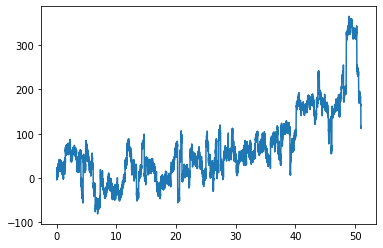

(6528,)
 VIDEO:  2


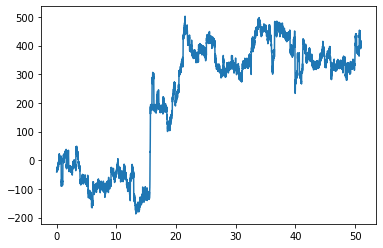

(6528,)
 VIDEO:  3


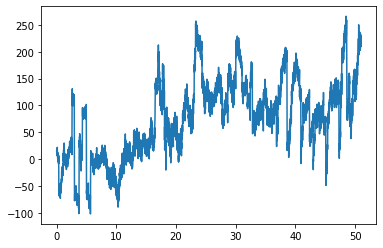

(6528,)
 VIDEO:  4


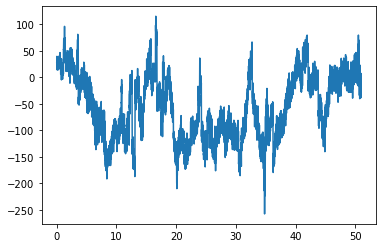

(6528,)
 VIDEO:  5


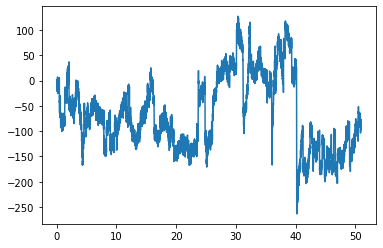

(6528,)
 VIDEO:  6


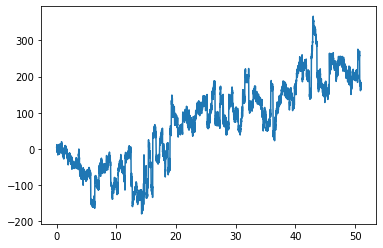

(6528,)
 VIDEO:  7


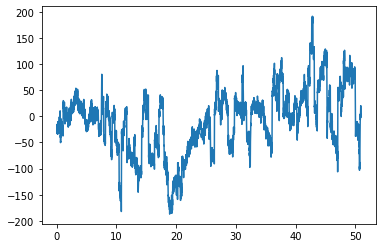

(6528,)
 VIDEO:  8


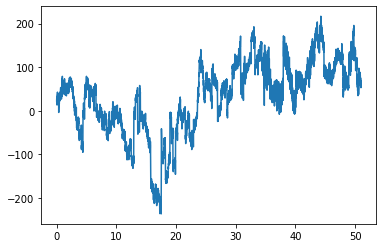

(6528,)
 VIDEO:  9


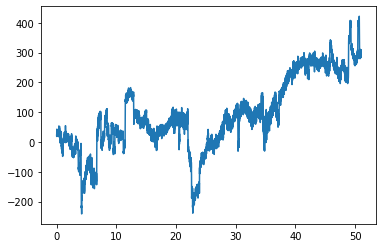

(6528,)
 VIDEO:  10


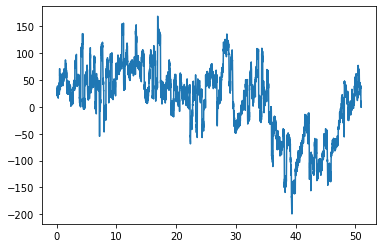

(6528,)
 VIDEO:  11


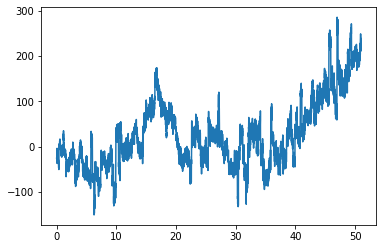

(6528,)
 VIDEO:  12


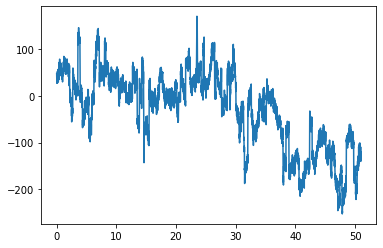

(6528,)
 VIDEO:  13


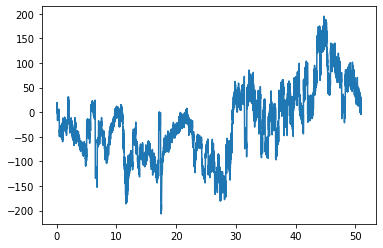

(6528,)
 VIDEO:  14


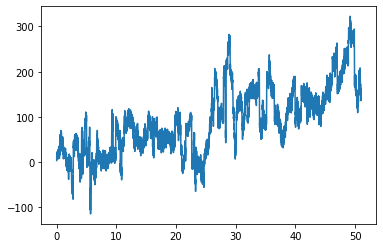

(6528,)
 VIDEO:  15


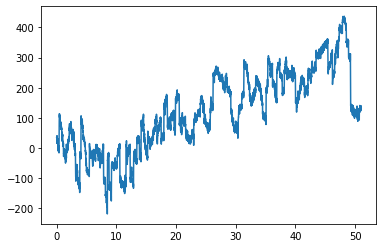

(6528,)
 VIDEO:  16


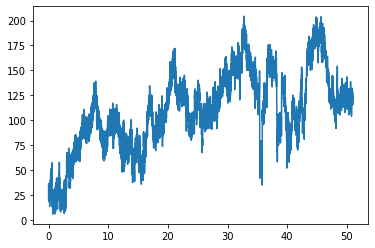

(6528,)
 VIDEO:  17


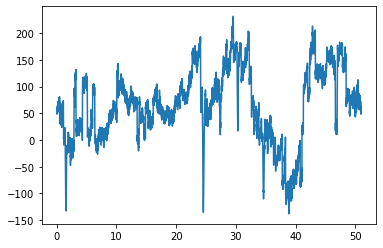

(6528,)
 VIDEO:  18


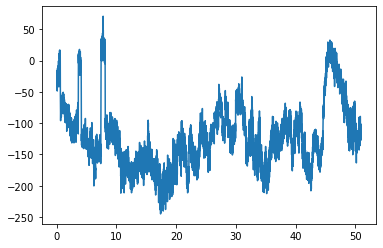

(6528,)
 VIDEO:  19


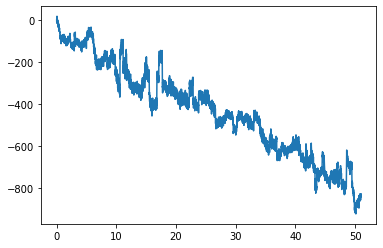

(6528,)
 VIDEO:  20


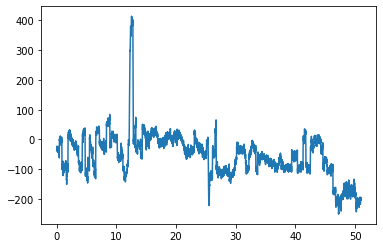

(6528,)
 VIDEO:  21


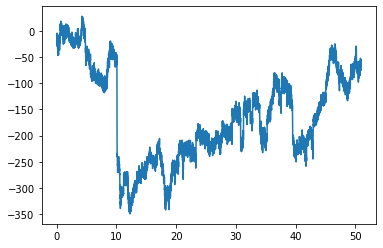

(6528,)
 VIDEO:  22


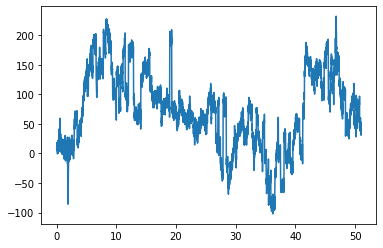

(6528,)
 VIDEO:  23


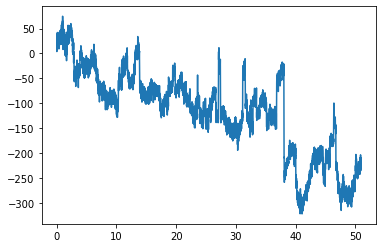

(6528,)
 VIDEO:  24


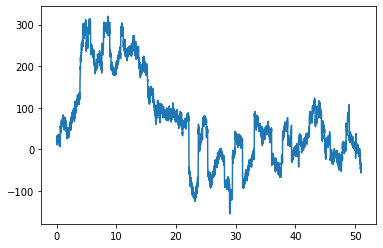

(6528,)
 VIDEO:  25


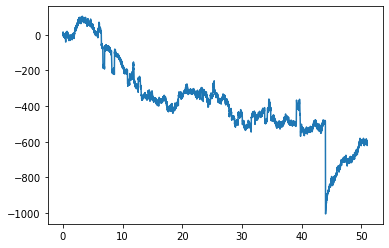

(6528,)
 VIDEO:  26


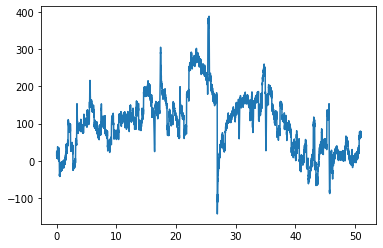

(6528,)
 VIDEO:  27


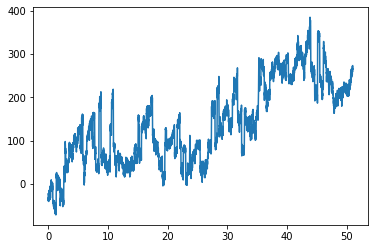

(6528,)
 VIDEO:  28


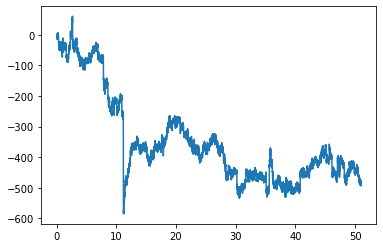

(6528,)
 VIDEO:  29


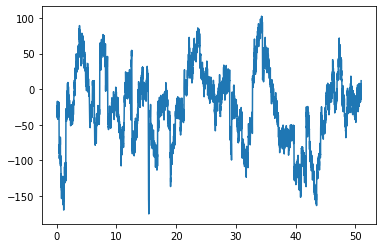

(6528,)
 VIDEO:  30


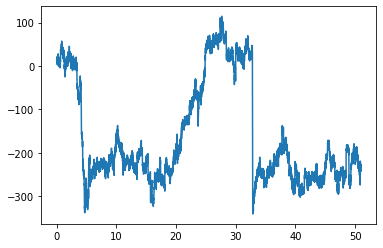

(6528,)
 VIDEO:  31


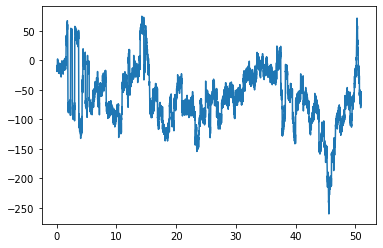

(6528,)
 VIDEO:  32


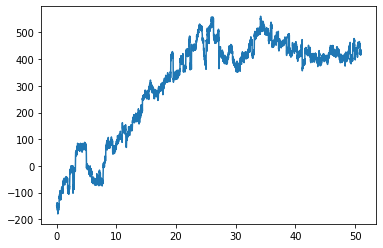

(6528,)
 VIDEO:  33


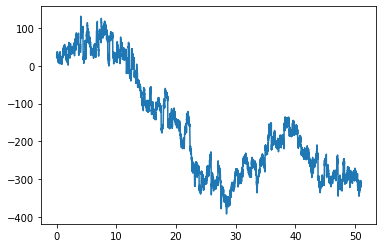

(6528,)
 VIDEO:  34


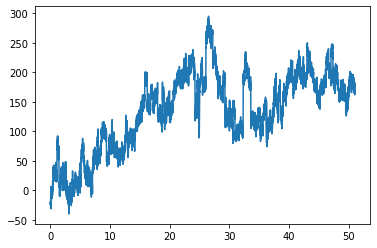

(6528,)
 VIDEO:  35


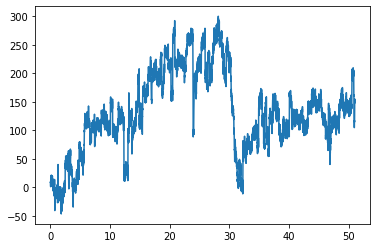

(6528,)
 VIDEO:  36


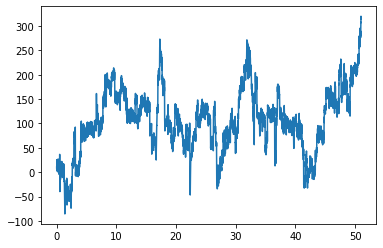

(6528,)
 VIDEO:  37


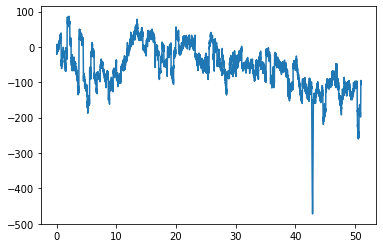

(6528,)
 VIDEO:  38


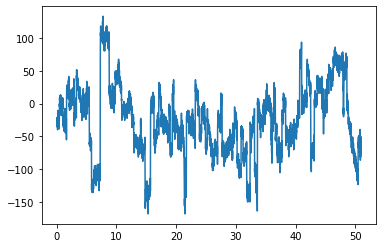

(6528,)
 VIDEO:  39


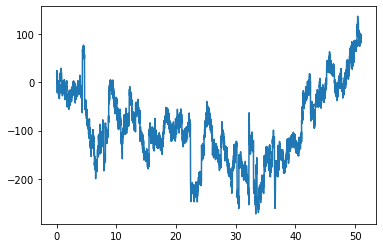

(6528,)
 VIDEO:  40


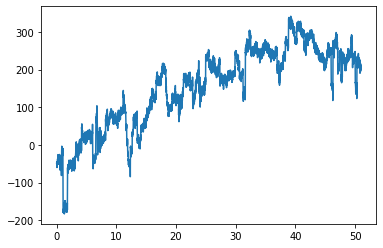

In [37]:
for i in range(40):
  signal_EOG = signalEOG(i)
  print(signal_EOG.shape)
  ts = len(signal_EOG)/128.
  time = np.linspace(0,ts,len(signal_EOG))

  print(" VIDEO: ", i+1)
  plt.plot(time,signal_EOG)
  #plt.ylabel('siemens')
  #plt.xlabel('s' )
  plt.show()

**PRIMERA CARACTERISTICA**

**Esta caracteristica muestra la varianza de la señal**

In [38]:
varianza_EOG=[]
for i in range(40):
  signal_EOG = signalEOG(i)
  varianza_EOG.append(np.var(signal_EOG))
  print("Varianza de la señal EOG", i+1, ":", varianza_EOG[i])

Varianza de la señal EOG 1 : 6727.043446620408
Varianza de la señal EOG 2 : 42287.5287043123
Varianza de la señal EOG 3 : 5152.040730275164
Varianza de la señal EOG 4 : 3609.9450349723315
Varianza de la señal EOG 5 : 5209.63519972661
Varianza de la señal EOG 6 : 13099.860116736172
Varianza de la señal EOG 7 : 3696.5975456427273
Varianza de la señal EOG 8 : 6841.180282669149
Varianza de la señal EOG 9 : 15183.741494845688
Varianza de la señal EOG 10 : 4187.276369157326
Varianza de la señal EOG 11 : 5575.974034946461
Varianza de la señal EOG 12 : 6602.60807628005
Varianza de la señal EOG 13 : 4800.385545208689
Varianza de la señal EOG 14 : 5277.209640916713
Varianza de la señal EOG 15 : 17161.339439805313
Varianza de la señal EOG 16 : 1535.4757741033975
Varianza de la señal EOG 17 : 4588.637636082729
Varianza de la señal EOG 18 : 2692.954262908243
Varianza de la señal EOG 19 : 47511.52024389517
Varianza de la señal EOG 20 : 5826.574540827656
Varianza de la señal EOG 21 : 7863.83811488337

**SEGUNDA CARACTERISTICA**

**Esta caracteristica muestra la media de la señal**

In [39]:
 promedio_EOG=[]
for i in range(40):
  signal_EOG = signalEOG(i)
  promedio_EOG.append(np.mean(signal_EOG))
  print("Promedio señal EOG", i+1, ":", promedio_EOG[i])

Promedio señal EOG 1 : 68.12879951344678
Promedio señal EOG 2 : 219.63836178018772
Promedio señal EOG 3 : 75.94643595689062
Promedio señal EOG 4 : -55.819261520008624
Promedio señal EOG 5 : -65.55831464141585
Promedio señal EOG 6 : 71.68617556130746
Promedio señal EOG 7 : -8.966737223123047
Promedio señal EOG 8 : 30.67719419714371
Promedio señal EOG 9 : 89.9346243413195
Promedio señal EOG 10 : 12.864411163936852
Promedio señal EOG 11 : 26.57808546454003
Promedio señal EOG 12 : -28.471607930897388
Promedio señal EOG 13 : -21.575749042743258
Promedio señal EOG 14 : 90.70379513973819
Promedio señal EOG 15 : 121.47688376748582
Promedio señal EOG 16 : 109.2050869726878
Promedio señal EOG 17 : 64.63004104260708
Promedio señal EOG 18 : -121.59821185977617
Promedio señal EOG 19 : -429.4586743380303
Promedio señal EOG 20 : -53.124538021895376
Promedio señal EOG 21 : -160.65858124551082
Promedio señal EOG 22 : 73.25966376913371
Promedio señal EOG 23 : -116.28369196153537
Promedio señal EOG 24 : 

**TERCERA CARACTERISTICA**

**Esta caracteristica muestra la energia de la señal**

In [40]:
canal_EOG = 33
def energia_señal(canal):
 
  energia_señal_EOG=[]
  
  for video in range (40):
    señal = X[video,canal-1,:] #señal
    ts = len(señal)/128. #tiempo de muestreo
    time = np.linspace(0,ts,len(señal)) #tiemppo

    cuadrado=señal**2
    energia = integrate.simps(cuadrado,time)#calculo la energia
    energia_señal_EOG.append(energia)
  return (energia_señal_EOG)

In [41]:
energia_EOG=[]
energia_EOG=energia_señal(canal_EOG)
print('Energia: '+'\n')
for i in range(40):
  print('Energia de la señal del Video '+str(i+1)+': '+str(energia_EOG[i]))

Energia: 

Energia de la señal del Video 1: 579834.3294965441
Energia de la señal del Video 2: 4617009.277106126
Energia de la señal del Video 3: 556802.5708220031
Energia de la señal del Video 4: 343059.6796652237
Energia de la señal del Video 5: 484932.41062704526
Energia de la señal del Video 6: 930211.4012803837
Energia de la señal del Video 7: 192653.81719544443
Energia de la señal del Video 8: 396942.12966596725
Energia de la señal del Video 9: 1186671.519500895
Energia de la señal del Video 10: 222022.30043975837
Energia de la señal del Video 11: 320248.6232519035
Energia de la señal del Video 12: 378078.22296055674
Energia de la señal del Video 13: 268600.6550046134
Energia de la señal del Video 14: 688754.5515531708
Energia de la señal del Video 15: 1627994.5934314695
Energia de la señal del Video 16: 686567.7505238403
Energia de la señal del Video 17: 447099.3691990748
Energia de la señal del Video 18: 891510.5812349403
Energia de la señal del Video 19: 11828385.870127399
Ene

**Se procede a realizar en analisis de la señal EEG que son los primeros 32 canales  del sujeto 13 a los 40 videos**

In [43]:
def eeg_spec_01(band):
    
    SPEE=[]
    potAbsoluta=[]
    
    if (band=='theta'):
        fil_band=[4, 7]
    if (band=='alpha'):
        fil_band=[8, 12]
    if (band=='beta'):
        fil_band=[13, 30]
    if (band=='gamma'):
        fil_band=[30, 45]
        
    for channel in range(32):
        for trial in range(40):
            
            eeg_sig = X[trial,channel,:]
            
            sos = scipy.signal.butter(7, fil_band, btype='bandpass',analog=False, fs=128, output='sos')
            
            
            filtered = scipy.signal.sosfilt(sos, eeg_sig)
              
            
            f, Spec = scipy.signal.welch(filtered, 128, window='hann')
            '''
            plt.semilogy(f, Spec)
            #plt.ylim([0.5e-3, 1])
            plt.xlabel('frequency [Hz]')
            plt.ylabel('PSD [V**2/Hz]')
            plt.show()
            '''
            
        
            
            potAbsoluta.append(np.sum(Spec))
            
    return(potAbsoluta)

**para Teta**

In [44]:
sp_theta=[]
sp_theta=eeg_spec_01('theta')

for i in range(32):
    for j in range(40):
        
        print('\n TOTAL Potencia espectral del canal ', i+1, 'video ', j+1)
        print('\n', sp_theta[j])

Se truncaron las últimas líneas 5000 del resultado de transmisión.
 TOTAL Potencia espectral del canal  1 video  31

 58.655570657598886

 TOTAL Potencia espectral del canal  1 video  32

 55.857791089893716

 TOTAL Potencia espectral del canal  1 video  33

 54.352672205055924

 TOTAL Potencia espectral del canal  1 video  34

 36.22837749145134

 TOTAL Potencia espectral del canal  1 video  35

 51.78330548620281

 TOTAL Potencia espectral del canal  1 video  36

 69.18655003569343

 TOTAL Potencia espectral del canal  1 video  37

 55.6627853566728

 TOTAL Potencia espectral del canal  1 video  38

 91.05150493075168

 TOTAL Potencia espectral del canal  1 video  39

 65.54180938242482

 TOTAL Potencia espectral del canal  1 video  40

 62.342888955776466

 TOTAL Potencia espectral del canal  2 video  1

 57.45153781886475

 TOTAL Potencia espectral del canal  2 video  2

 57.078383004222886

 TOTAL Potencia espectral del canal  2 video  3

 70.5962848030827

 TOTAL Potencia espectr

**Para Alfa** 

In [45]:
sp_alpha=[]

sp_alpha=eeg_spec_01('alpha')

for i in range(32):
    for j in range(40):
        
        print('\n TOTAL Potencia espectral del canal ', i+1, 'video ', j+1)
        print('\n', sp_alpha[j])

Se truncaron las últimas líneas 5000 del resultado de transmisión.
 TOTAL Potencia espectral del canal  1 video  31

 21.736097740615772

 TOTAL Potencia espectral del canal  1 video  32

 22.318530306032685

 TOTAL Potencia espectral del canal  1 video  33

 18.264799694643518

 TOTAL Potencia espectral del canal  1 video  34

 15.974317945282117

 TOTAL Potencia espectral del canal  1 video  35

 19.27352881897994

 TOTAL Potencia espectral del canal  1 video  36

 22.734209966298252

 TOTAL Potencia espectral del canal  1 video  37

 23.13412721482562

 TOTAL Potencia espectral del canal  1 video  38

 25.668525940233845

 TOTAL Potencia espectral del canal  1 video  39

 23.296103022033925

 TOTAL Potencia espectral del canal  1 video  40

 22.13679844593569

 TOTAL Potencia espectral del canal  2 video  1

 20.138608336172236

 TOTAL Potencia espectral del canal  2 video  2

 23.67405711717067

 TOTAL Potencia espectral del canal  2 video  3

 29.17276458625683

 TOTAL Potencia es

**Para Beta** 

In [47]:
sp_beta=[]

sp_beta=eeg_spec_01('beta')

for i in range(32):
    for j in range(40):
        
        print('\n TOTAL Potencia espectral del canal ', i+1, 'video ', j+1)
        print('\n', sp_beta[j])

Se truncaron las últimas líneas 5000 del resultado de transmisión.
 TOTAL Potencia espectral del canal  1 video  31

 59.5935595505006

 TOTAL Potencia espectral del canal  1 video  32

 50.154662203234

 TOTAL Potencia espectral del canal  1 video  33

 41.886661530497896

 TOTAL Potencia espectral del canal  1 video  34

 52.28213977492957

 TOTAL Potencia espectral del canal  1 video  35

 45.9553542550367

 TOTAL Potencia espectral del canal  1 video  36

 46.75118169505032

 TOTAL Potencia espectral del canal  1 video  37

 41.73610503275459

 TOTAL Potencia espectral del canal  1 video  38

 45.63487058520709

 TOTAL Potencia espectral del canal  1 video  39

 41.19656414012151

 TOTAL Potencia espectral del canal  1 video  40

 65.45505053537609

 TOTAL Potencia espectral del canal  2 video  1

 45.871658314256194

 TOTAL Potencia espectral del canal  2 video  2

 42.67256369166822

 TOTAL Potencia espectral del canal  2 video  3

 57.04363133658193

 TOTAL Potencia espectral de

**Para Gamma** 

In [48]:
sp_gamma=[]

sp_gamma=eeg_spec_01('gamma')

for i in range(32):
    for j in range(40):
        
        print('\n TOTAL Potencia espectral del canal ', i+1, 'video ', j+1)
        print('\n', sp_gamma[j])

Se truncaron las últimas líneas 5000 del resultado de transmisión.
 TOTAL Potencia espectral del canal  1 video  31

 36.65704522498587

 TOTAL Potencia espectral del canal  1 video  32

 32.26824395376794

 TOTAL Potencia espectral del canal  1 video  33

 24.914716576720103

 TOTAL Potencia espectral del canal  1 video  34

 34.63597437576251

 TOTAL Potencia espectral del canal  1 video  35

 24.773033560338526

 TOTAL Potencia espectral del canal  1 video  36

 24.667072352608105

 TOTAL Potencia espectral del canal  1 video  37

 23.27312563217418

 TOTAL Potencia espectral del canal  1 video  38

 31.002364591068115

 TOTAL Potencia espectral del canal  1 video  39

 22.856335351931534

 TOTAL Potencia espectral del canal  1 video  40

 41.946879397953374

 TOTAL Potencia espectral del canal  2 video  1

 25.95423206250673

 TOTAL Potencia espectral del canal  2 video  2

 21.991541888472266

 TOTAL Potencia espectral del canal  2 video  3

 43.67168439991045

 TOTAL Potencia esp

**Potencia entre los pares de electrodos**

In [49]:
# El orden de SPEEpair los primeros 14 son para el primer video los siguientes 14 son para el segundo video (varia el par y luego el video)

#SPEEpair=[]
#pair=[]

def eeg_spec_pair(band):
    if (band=='theta'):
        fil_band=[4, 7]
    if (band=='alpha'):
        fil_band=[8, 12]
    if (band=='beta'):
        fil_band=[13, 30]
    if (band=='gamma'):
        fil_band=[30, 45]
    
    SPEEpair=[]

    for trial in range (40):
        
        pair=[]
        pair.append(X[trial,0,:] - X[trial,16,:])
        pair.append(X[trial,1,:] - X[trial,17,:])
        pair.append(X[trial,2,:] - X[trial,19,:])
        pair.append(X[trial,3,:] - X[trial,20,:])
        pair.append(X[trial,4,:] - X[trial,21,:])
        pair.append(X[trial,5,:] - X[trial,22,:])
        pair.append(X[trial,6,:] - X[trial,24,:])
        pair.append(X[trial,7,:] - X[trial,25,:])
        pair.append(X[trial,8,:] - X[trial,26,:])
        pair.append(X[trial,9,:] - X[trial,27,:])
        pair.append(X[trial,10,:] - X[trial,28,:])
        pair.append(X[trial,11,:] - X[trial,29,:])
        pair.append(X[trial,12,:] - X[trial,30,:])
        pair.append(X[trial,13,:] - X[trial,31,:])
        
        for i in range(14):
            eeg_sig= pair[i]
            sos = scipy.signal.butter(5, fil_band, btype='bandpass',analog=False, fs=128, output='sos')
            #ts = len(eeg_sig)/128.
            #time = np.linspace(0,ts,len(eeg_sig))

            filtered = scipy.signal.sosfilt(sos, eeg_sig)

            #print('\nSpectral power of pair ', channel+1, 'video ', trial+1)
            Spec=0
            f, Spec = scipy.signal.welch(filtered, 128, window='hann')
            
            '''
            plt.semilogy(f, Spec)
            #plt.ylim([0.5e-3, 1])
            plt.xlabel('frequency [Hz]')
            plt.ylabel('PSD [V**2/Hz]')
            plt.show()
            '''
            
            SPEEpair.append(np.sum(Spec))
            
    return(SPEEpair)

**Para Teta**

In [50]:
theta=[]
theta=eeg_spec_pair('theta')

#print((pair_sp_theta))
k=0
for i in range(40):
    for j in range(14):
        print('\n Potencia espectral TOTAL de PAR ', j+1, 'del video ', i+1)
        print('\n', theta[k])
        k=k+1


 Potencia espectral TOTAL de PAR  1 del video  1

 40.9523891108458

 Potencia espectral TOTAL de PAR  2 del video  1

 15.273280903628224

 Potencia espectral TOTAL de PAR  3 del video  1

 370.5675548860686

 Potencia espectral TOTAL de PAR  4 del video  1

 12.531850098044522

 Potencia espectral TOTAL de PAR  5 del video  1

 37.51395664585088

 Potencia espectral TOTAL de PAR  6 del video  1

 39.33138709317109

 Potencia espectral TOTAL de PAR  7 del video  1

 105.11956185341991

 Potencia espectral TOTAL de PAR  8 del video  1

 4253.15675127627

 Potencia espectral TOTAL de PAR  9 del video  1

 51.51497173046074

 Potencia espectral TOTAL de PAR  10 del video  1

 14.384781446879519

 Potencia espectral TOTAL de PAR  11 del video  1

 705.5078773775857

 Potencia espectral TOTAL de PAR  12 del video  1

 162.23472039337176

 Potencia espectral TOTAL de PAR  13 del video  1

 235.87490776674292

 Potencia espectral TOTAL de PAR  14 del video  1

 20.46160418080262

 Potencia 

**Para Alfa**

In [51]:
alpha=[]
alpha=eeg_spec_pair('alpha')

k=0
for i in range(40):
    for j in range(14):
        
        print('\n Potencia espectral TOTAL de PAR ', j+1, 'del video ', i+1)
        print('\n', alpha[k])
        k=k+1


 Potencia espectral TOTAL de PAR  1 del video  1

 16.846944826442932

 Potencia espectral TOTAL de PAR  2 del video  1

 5.621316767367021

 Potencia espectral TOTAL de PAR  3 del video  1

 87.66785243959552

 Potencia espectral TOTAL de PAR  4 del video  1

 7.425870834431208

 Potencia espectral TOTAL de PAR  5 del video  1

 16.880546314154966

 Potencia espectral TOTAL de PAR  6 del video  1

 15.409966061259283

 Potencia espectral TOTAL de PAR  7 del video  1

 23.533992954084223

 Potencia espectral TOTAL de PAR  8 del video  1

 609.537124072038

 Potencia espectral TOTAL de PAR  9 del video  1

 18.162005237361885

 Potencia espectral TOTAL de PAR  10 del video  1

 4.959964958599347

 Potencia espectral TOTAL de PAR  11 del video  1

 122.27227649674137

 Potencia espectral TOTAL de PAR  12 del video  1

 50.6850691087068

 Potencia espectral TOTAL de PAR  13 del video  1

 41.565981967094245

 Potencia espectral TOTAL de PAR  14 del video  1

 14.908449166988344

 Potenci

**Para Beta**

In [52]:
beta=[]
beta=eeg_spec_pair('beta')

k=0
for i in range(40):
    for j in range(14):
        
        print('\n Potencia espectral TOTAL de PAR ', j+1, 'del video ', i+1)
        print('\n', beta[k])
        k=k+1


 Potencia espectral TOTAL de PAR  1 del video  1

 58.338742361366585

 Potencia espectral TOTAL de PAR  2 del video  1

 13.35216230196179

 Potencia espectral TOTAL de PAR  3 del video  1

 125.05097427371025

 Potencia espectral TOTAL de PAR  4 del video  1

 13.844082095355041

 Potencia espectral TOTAL de PAR  5 del video  1

 26.46995979348272

 Potencia espectral TOTAL de PAR  6 del video  1

 21.68171059174419

 Potencia espectral TOTAL de PAR  7 del video  1

 36.8642257043387

 Potencia espectral TOTAL de PAR  8 del video  1

 864.2591887871207

 Potencia espectral TOTAL de PAR  9 del video  1

 26.549906887979063

 Potencia espectral TOTAL de PAR  10 del video  1

 8.219066716635313

 Potencia espectral TOTAL de PAR  11 del video  1

 174.69980862090225

 Potencia espectral TOTAL de PAR  12 del video  1

 77.88482254823431

 Potencia espectral TOTAL de PAR  13 del video  1

 60.38890219840494

 Potencia espectral TOTAL de PAR  14 del video  1

 35.40090099831634

 Potencia 

**Para Gamma**

In [53]:
gamma=[]
gamma=eeg_spec_pair('beta')

k=0
for i in range(40):
    for j in range(14):
        
        print('\n Potencia espectral TOTAL de PAR ', j+1, 'del video ', i+1)
        print('\n', gamma[k])
        k=k+1


 Potencia espectral TOTAL de PAR  1 del video  1

 58.338742361366585

 Potencia espectral TOTAL de PAR  2 del video  1

 13.35216230196179

 Potencia espectral TOTAL de PAR  3 del video  1

 125.05097427371025

 Potencia espectral TOTAL de PAR  4 del video  1

 13.844082095355041

 Potencia espectral TOTAL de PAR  5 del video  1

 26.46995979348272

 Potencia espectral TOTAL de PAR  6 del video  1

 21.68171059174419

 Potencia espectral TOTAL de PAR  7 del video  1

 36.8642257043387

 Potencia espectral TOTAL de PAR  8 del video  1

 864.2591887871207

 Potencia espectral TOTAL de PAR  9 del video  1

 26.549906887979063

 Potencia espectral TOTAL de PAR  10 del video  1

 8.219066716635313

 Potencia espectral TOTAL de PAR  11 del video  1

 174.69980862090225

 Potencia espectral TOTAL de PAR  12 del video  1

 77.88482254823431

 Potencia espectral TOTAL de PAR  13 del video  1

 60.38890219840494

 Potencia espectral TOTAL de PAR  14 del video  1

 35.40090099831634

 Potencia 

**Creando vectores**

In [122]:
thetapar1=[]
thetapar2=[]
thetapar3=[]
thetapar4=[]
thetapar5=[]
thetapar6=[]
thetapar7=[]
thetapar8=[]
thetapar9=[]
thetapar10=[]
thetapar11=[]
thetapar12=[]
thetapar13=[]
thetapar14=[]

for i in range(40):
  thetapar1.append(theta[i*14])
  thetapar2.append(theta[i*14+1])
  thetapar3.append(theta[i*14+2])
  thetapar4.append(theta[i*14+3])
  thetapar5.append(theta[i*14+4])
  thetapar6.append(theta[i*14+5])
  thetapar7.append(theta[i*14+6])
  thetapar8.append(theta[i*14+7])
  thetapar9.append(theta[i*14+8])
  thetapar10.append(theta[i*14+9])
  thetapar11.append(theta[i*14+10])
  thetapar12.append(theta[i*14+11])
  thetapar13.append(theta[i*14+12])
  thetapar14.append(theta[i*14+13])

**Base de datos**


In [123]:
labels = db['labels']
Valence = labels[:,0]
Arousal = labels[:,1]

print(labels[9,:])

[4.01 9.   7.05 6.04]


**etiquetas de las emociones**

In [124]:
pos = 'positive' 
neu = 'neutral' 
neg = 'negative' 
stress = 'stress' 
calm = 'calm' 

**Matriz con las etiquetas**

In [130]:

F=[]
for i in range(40):
  F.append("          ")
emocion=np.transpose(F)

In [131]:
negA = np.logical_and(Arousal>=1,Arousal<=3) # extraccion valores negativos de arousal
negV = np.logical_and(Valence>=1,Valence<=3) # extraccion valores negativos de valence
neutralA = np.logical_and(Arousal>3,Arousal<7) # extraccion valores neutros de arousal
neutralV = np.logical_and(Valence>3,Valence<7) # extraccion valores neutros de valence
posA = Arousal>=7 # extraccion valores positivos de arousal
posV = Valence>=7 # extraccion valores positivos valence

Etiquetas = np.zeros((40,1))

Etiquetas[np.where(np.logical_and(negA,negV))] = 1. # Emocion Negativa negA y negV

Etiquetas[np.where(np.logical_and(neutralA,neutralA))] = 2.# Emocion Neutral neutralA y neutralV

Etiquetas[np.where(np.logical_and(posA,posV))] = 3. # Emocion Positiva posA y posV

Etiquetas[np.where(np.logical_and(posA,negV))] = 4. # Emocion Stress posA y negV

Etiquetas[np.where(np.logical_and(negA,posV))] = 5. # Emocion Calm negA y posV

Etiquetas[np.where(np.logical_and(neutralA,negV))] = 6. # Emocion Tristeza neutralA y negV

Etiquetas[np.where(np.logical_and(neutralA,posV))] = 7. # E3mocion Satisfecho (Pleasant) neutralA y posV

Etiquetas[np.where(np.logical_and(negA,neutralV))] = 8. # Emocion Tranquilidad negA y neutralV

Etiquetas[np.where(np.logical_and(posA,neutralV))] = 9. # Emocion Sorpresa posA y neutralV

#ciclo para emparejar los valores de las etiquetas con las palabras de las emociones
for i in range(40):
  if(Etiquetas[i]==1.):
    emocion[i]="negativa"
  if(Etiquetas[i]==2.):
    emocion[i]="neutral"
  if(Etiquetas[i]==3.):
    emocion[i]="positiva"
  if(Etiquetas[i]==4.):
    emocion[i]="estres"      #"Stress"
  if(Etiquetas[i]==5.):
    emocion[i]="positiva"
  if(Etiquetas[i]==6.):
    emocion[i]="tristeza"
  if(Etiquetas[i]==7.):
    emocion[i]="satisfecho"
  if(Etiquetas[i]==8.):
    emocion[i]="tranquilidad"
  if(Etiquetas[i]==9.):
    emocion[i]="sorpresa"

In [132]:
print(emocion.shape)

(40,)


In [134]:
#creacion de la matriz final con todas las caracteristicas
matriz=[]
matriz.append(promedio_GSR)
matriz.append(promedio_Derivada_GSR)
matriz.append(sumatoria)
matriz.append(promedio_Volumensangre)
matriz.append(desviacion_Volumensangre)
matriz.append(R_energy_BVP)
matriz.append(promedio_Respiracion)
matriz.append(promedio_Derivada_Respiracion)
matriz.append(desviacion_Respiracion)
matriz.append(promedio_Tempetatura)
matriz.append(promedio_Derivada_Temperatura)
matriz.append(sumatoria1)   #TEMPERATURA
matriz.append(sumatoria2)   #TEMPERATURA
matriz.append(energia_EMG)
matriz.append(varianza_EMG)
matriz.append(promedio_EMG)
matriz.append(energia_EOG)
matriz.append(varianza_EOG)
matriz.append(promedio_EOG)

for i in range(32):
  matriz.append(sp_theta[(40*i):40*(i+1)])  

matriz.append(thetapar1)
matriz.append(thetapar2)
matriz.append(thetapar3)
matriz.append(thetapar4)
matriz.append(thetapar5)
matriz.append(thetapar6)
matriz.append(thetapar7)
matriz.append(thetapar8)
matriz.append(thetapar9)
matriz.append(thetapar10)
matriz.append(thetapar11)
matriz.append(thetapar12)
matriz.append(thetapar13)
matriz.append(thetapar14)

#matriz transpuesta
matriz_transpuesta=np.transpose(matriz)

In [135]:
# Creamos el dataframe
dataset = pd.DataFrame(matriz_transpuesta)
#dataset['labels'] = np.transpose(emocion)
#dataset.to_pickle('./featS17.pkl')
print(dataset)

              0         1             2   ...          62          63         64
0    1883.154295  0.866422  8.168299e-13  ...  162.234720  235.874908  20.461604
1    3713.852757  1.095082  4.967618e-12  ...  138.698536  268.032580  17.959412
2    4368.021544  1.682202  8.335445e-13  ...  122.104415  186.806830  15.910003
3    3374.094974  0.957658  5.179786e-13  ...  123.739895  153.421217  12.128143
4    8206.456245  2.203056  1.433197e-12  ...  128.201419  137.903353  16.093864
5    4768.929462  1.489051  9.023078e-13  ...  188.993124  342.536697  22.395517
6    4631.394631  1.115397  1.051340e-12  ...  166.146251  292.875931  20.423701
7    5177.423351  1.214685  4.379966e-13  ...  151.790084  248.475075  13.150142
8    4878.052959  1.261436  1.722234e-12  ...  148.444188  151.559268  15.104434
9    6118.103603  1.587678  5.949367e-13  ...  201.099328  222.166112  20.343634
10  -3861.157697 -0.336159  8.655205e-12  ...  174.967038  423.677155  22.495837
11   7816.584445  2.088876  

In [137]:
#dataframe
dataset = pd.DataFrame(matriz_transpuesta)
dataset['labels'] = emocion
dataset.to_pickle('./featS17.pkl')

In [138]:



dataset.columns =['promedio GSR','promedio derivada GSR', 'desviacion GSR', 'promedio volumen sangre', 'desviacion volumen sangre', 'relación energia volumen sangre','promedio respiracion', 'promedio derivada respiracion','desviacion respiracion' ,'promedio temperatura', 'promedio derivada temperatura', 'DPS B1', 'DPS B2', 'energia EMG','varianza EMG', 'media EMG', 'energia EOG','varianza EOG', 'media EOG','DPS TOTAL theta canal 1','DPS TOTAL theta canal 2','DPS TOTAL theta canal 3','DPS TOTAL theta canal 4','DPS TOTAL theta canal 5','DPS TOTAL theta canal 6','DPS TOTAL theta canal 7' ,'DPS TOTAL theta canal 8','DPS TOTAL theta canal 9','DPS TOTAL theta canal 10','DPS TOTAL theta canal 11','DPS TOTAL theta canal 12','DPS TOTAL theta canal 13','DPS TOTAL theta canal 14','DPS TOTAL theta canal 15','DPS TOTAL theta canal 16','DPS TOTAL theta canal 17','DPS TOTAL theta canal 18','DPS TOTAL theta canal 19','DPS TOTAL theta canal 20','DPS TOTAL theta canal 21','DPS TOTAL theta canal 22','DPS TOTAL theta canal 23','DPS TOTAL theta canal 24','DPS TOTAL theta canal 25','DPS TOTAL theta canal 26','DPS TOTAL theta canal 27','DPS TOTAL theta canal 28','DPS TOTAL theta canal 29','DPS TOTAL theta canal 30','DPS TOTAL theta canal 31','DPS TOTAL theta canal 32','DPS TOTAL theta par 1' ,'DPS TOTAL theta par 2','DPS TOTAL theta par 3','DPS TOTAL theta par 4','DPS TOTAL theta par 5','DPS TOTAL theta par 6','DPS TOTAL theta par 7','DPS TOTAL theta par 8','DPS TOTAL theta par 9','DPS TOTAL theta par 10','DPS TOTAL theta par 11','DPS TOTAL theta par 12','DPS TOTAL theta par 13','DPS TOTAL theta par 14','EMOCIÓN']
dataset.rename(index={0:'Video 1',1:'Video 2',2:'Video 3',3:'Video 4',4:'Video 5',5:'Video 6',6:'Video 7',7:'Video 8',8:'Video 9',9:'Video 10',10:'Video 11',11:'Video 12',12:'Video 13',13:'Video 14',14:'Video 15',15:'Video 16',16:'Video 17',17:'Video 18',18:'Video 19',19:'Video 20',20:'Video 21',21:'Video 22',22:'Video 23',23:'Video 24',24:'Video 25',25:'Video 26',26:'Video 27',27:'Video 28',28:'Video 29',29:'Video 30',30:'Video 31',31:'Video 32',32:'Video 33',33:'Video 34',34:'Video 35',35:'Video 36',36:'Video 37',37:'Video 38',38:'Video 39',39:'Video 40'}, inplace=True)


In [139]:
dataset

promedio GSR  ...     EMOCIÓN
Video 1    1883.154295  ...    sorpresa
Video 2    3713.852757  ...    sorpresa
Video 3    4368.021544  ...    positiva
Video 4    3374.094974  ...    positiva
Video 5    8206.456245  ...    sorpresa
Video 6    4768.929462  ...     neutral
Video 7    4631.394631  ...      estres
Video 8    5177.423351  ...    positiva
Video 9    4878.052959  ...  satisfecho
Video 10   6118.103603  ...    sorpresa
Video 11  -3861.157697  ...  satisfecho
Video 12   7816.584445  ...     neutral
Video 13   9068.507344  ...    positiva
Video 14   -949.399373  ...  satisfecho
Video 15   8376.623015  ...  tranquilid
Video 16  19446.045045  ...  tranquilid
Video 17   6729.996136  ...     neutral
Video 18   5257.016827  ...  satisfecho
Video 19   3562.169781  ...  satisfecho
Video 20   7160.579460  ...  satisfecho
Video 21   6798.456728  ...    tristeza
Video 22   5284.127060  ...     neutral
Video 23   4675.130325  ...    tristeza
Video 24  15074.870359  ...    tristeza
Video 25   3945.609519  ...     neutral
Video 26  10587.912110  ...     neutral
Video 27   5393.555043  ...     neutral
Video 28   7099.112173  ...    positiva
Video 29  10628.406158  ...    sorpresa
Video 30   6018.705511  ...    sorpresa
Video 31   7392.955243  ...      estres
Video 32   5436.900028  ...    sorpresa
Video 33   4604.074502  ...    sorpresa
Video 34   5865.883632  ...      estres
Video 35   5418.126468  ...      estres
Video 36   2640.655662  ...      estres
Video 37   5401.003637  ...      estres
Video 38   4326.553200  ...      estres
Video 39  -1273.794848  ...      estres
Video 40   7430.191541  ...    sorpresa

[40 rows x 66 columns]

In [154]:
diferencias_GSR = dataset[['promedio GSR','promedio derivada GSR', 'desviacion GSR', 'EMOCIÓN']].copy()
diferencias_Volumensangre = dataset[['promedio volumen sangre', 'desviacion volumen sangre', 'relación energia volumen sangre', 'EMOCIÓN']].copy()
diferencias_Respiracion = dataset[['promedio respiracion', 'promedio derivada respiracion','desviacion respiracion' , 'EMOCIÓN']].copy() 
diferencias_Temperatura = dataset[['promedio temperatura', 'promedio derivada temperatura', 'DPS B1', 'DPS B2', 'EMOCIÓN']].copy()


diferencias_GSR_vs_Volumensangre = dataset[['promedio GSR','promedio derivada GSR', 'desviacion GSR', 'promedio volumen sangre', 'desviacion volumen sangre', 'relación energia volumen sangre', 'EMOCIÓN']].copy()
diferencias_Respiracion_vs_Temperatura = dataset[['promedio respiracion', 'promedio derivada respiracion','desviacion respiracion' ,'promedio temperatura', 'promedio derivada temperatura', 'DPS B1', 'DPS B2', 'EMOCIÓN']].copy()

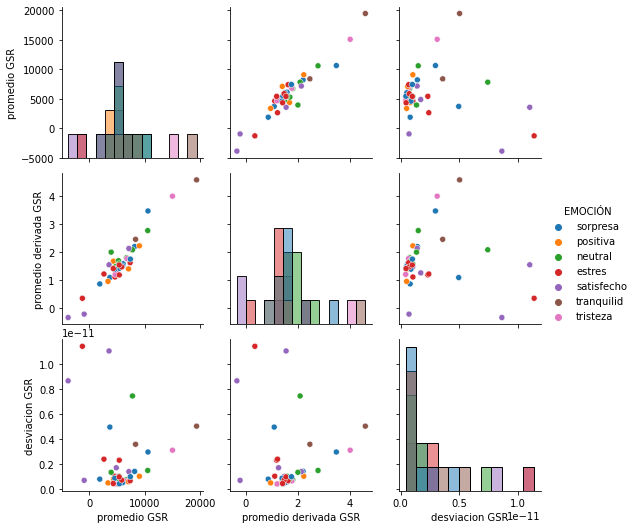

In [150]:
# Comparacion senales GSR 
import seaborn as sns
a = sns.PairGrid(diferencias_GSR, hue="EMOCIÓN")
a.map_diag(sns.histplot)
a.map_offdiag(sns.scatterplot)
a.add_legend()

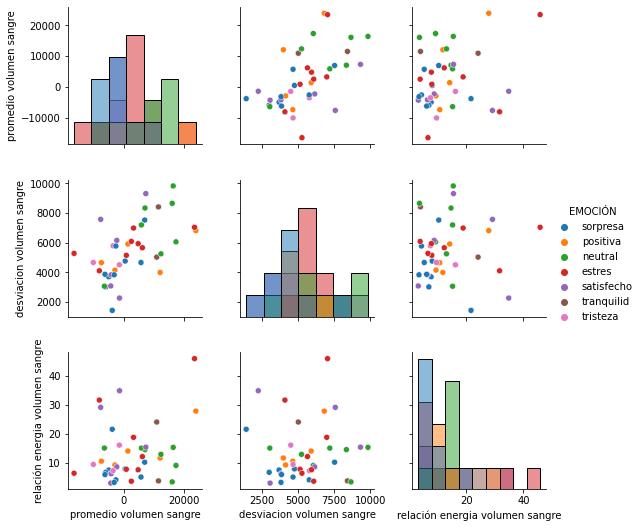

In [151]:
# Comparacion senales Presion volumen en la sangre 
import seaborn as sns
a = sns.PairGrid(diferencias_Volumensangre, hue="EMOCIÓN")
a.map_diag(sns.histplot)
a.map_offdiag(sns.scatterplot)
a.add_legend()

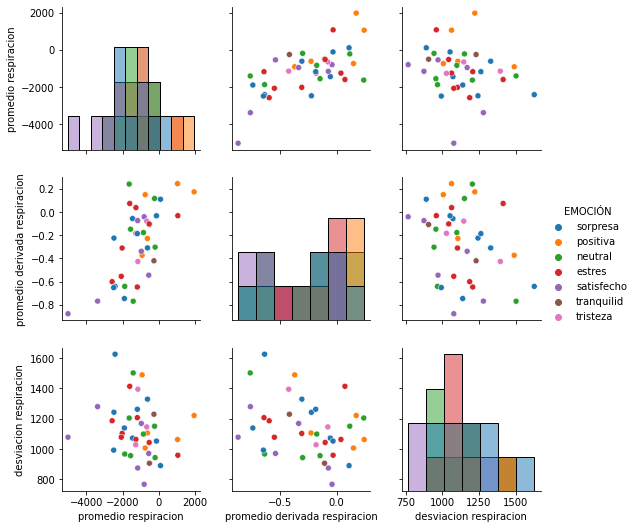

In [152]:
# Comparacion Senales Respiracion
import seaborn as sns
a = sns.PairGrid(diferencias_Respiracion, hue="EMOCIÓN")
a.map_diag(sns.histplot)
a.map_offdiag(sns.scatterplot)
a.add_legend()

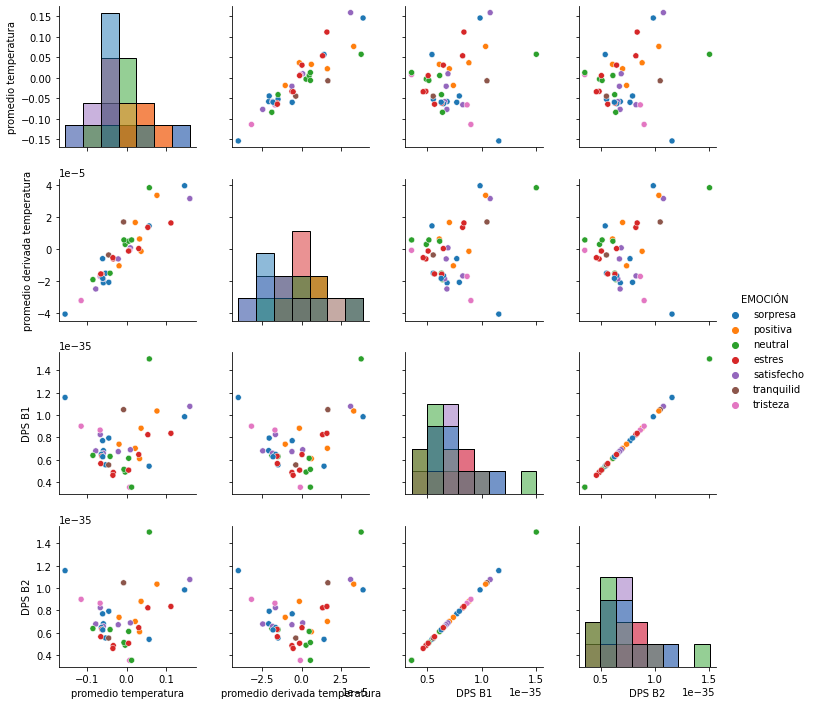

In [153]:
# Comparacion senal de temperatura
import seaborn as sns
a = sns.PairGrid(diferencias_Temperatura, hue="EMOCIÓN")
a.map_diag(sns.histplot)
a.map_offdiag(sns.scatterplot)
a.add_legend()

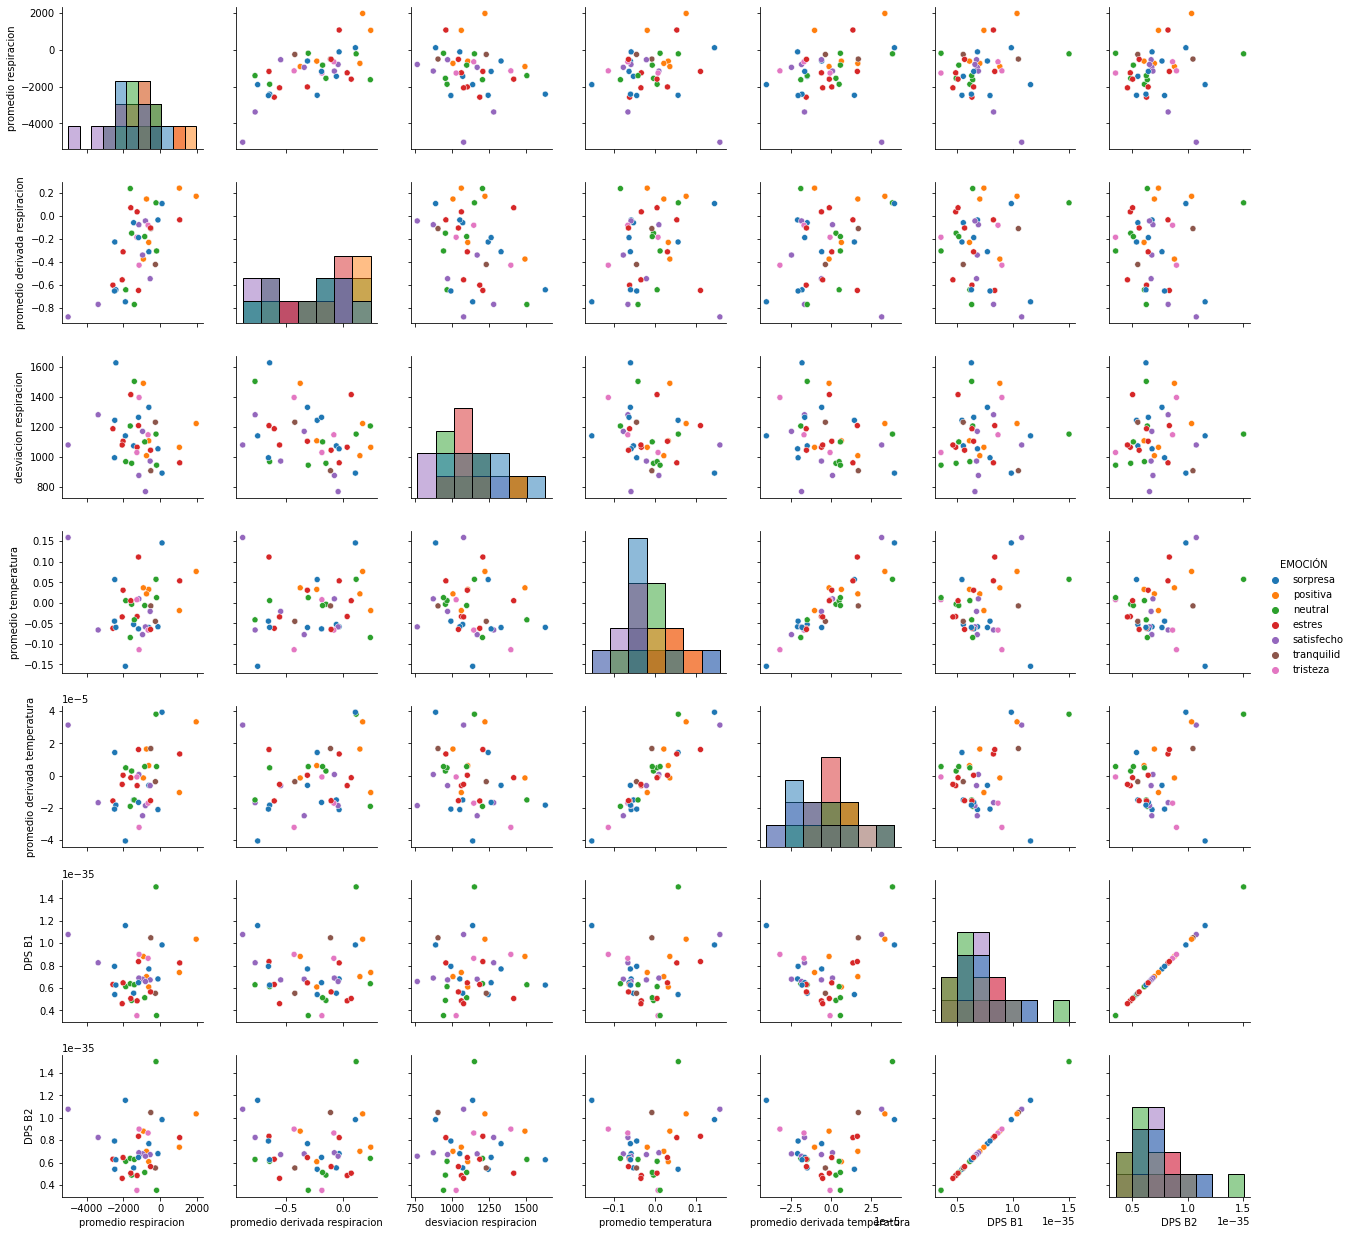

In [157]:
# comparacion entre señal respiracion y señal de temperatura
import seaborn as sns
a = sns.PairGrid(diferencias_Respiracion_vs_Temperatura, hue="EMOCIÓN")
a.map_diag(sns.histplot)
a.map_offdiag(sns.scatterplot)
a.add_legend()

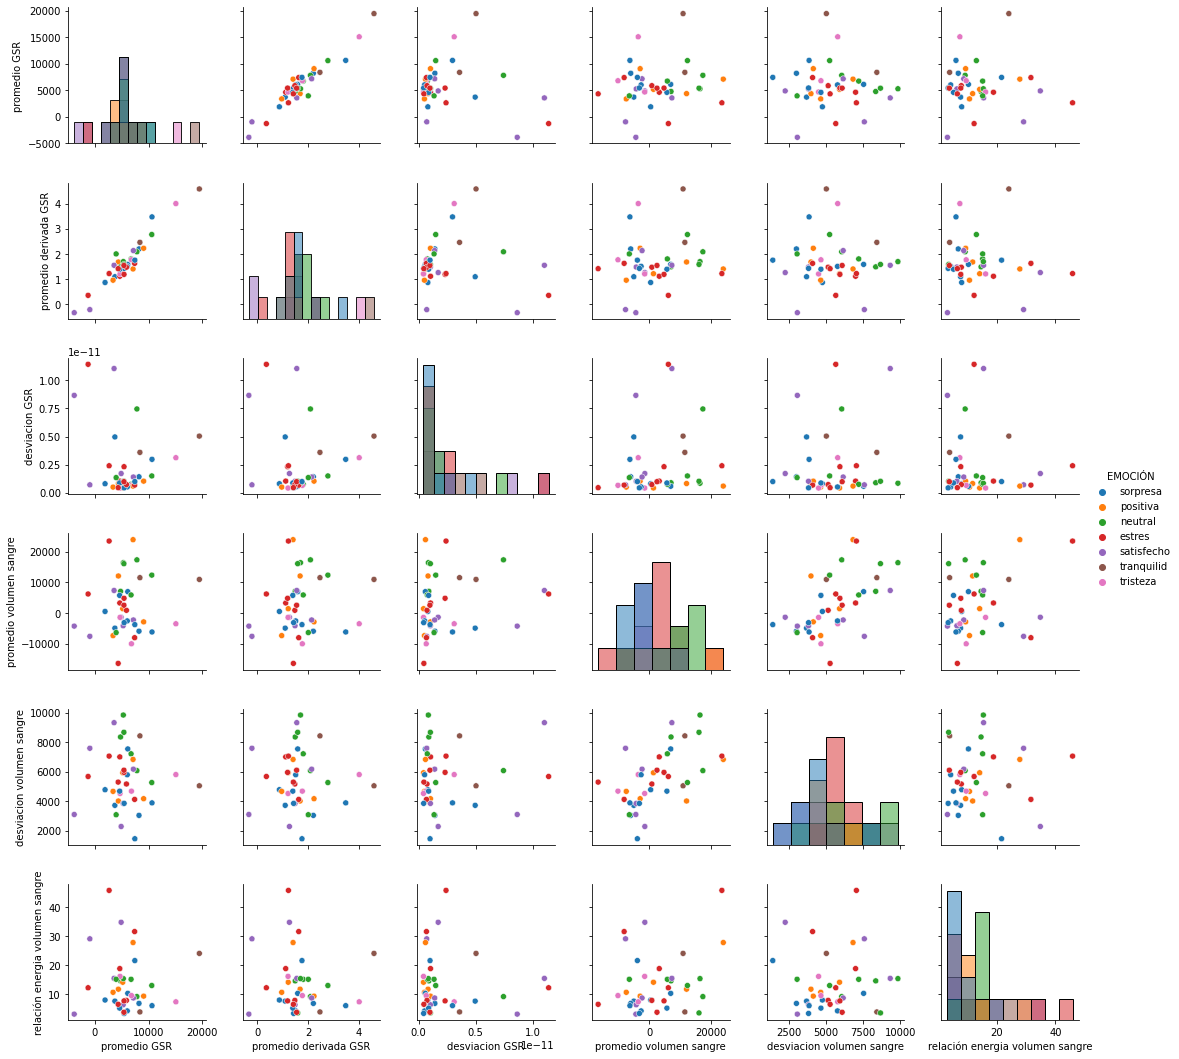

In [155]:
# comparacion entre señal GSR y señal presion volumen sangre
import seaborn as sns
a = sns.PairGrid(diferencias_GSR_vs_Volumensangre, hue="EMOCIÓN")
a.map_diag(sns.histplot)
a.map_offdiag(sns.scatterplot)
a.add_legend()

**Analisis de las Gráficas**

**Mauro analice las graficas y les pone unas observaciones**